In [47]:
import pandas as pd
import numpy as np
import matplotlib as plt
from nltk.tokenize import TweetTokenizer # doesn't split at apostrophes
from nltk import Text
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize  
from nltk.tokenize import sent_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from gensim import corpora
from gensim.models import Phrases
# from ds_voc.text_processing import TextProcessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")

In [782]:
cleaned = []
def cleaning(text):
    from nltk.tokenize import word_tokenize
    tokens = word_tokenize(text)
#     convert to lower case
    tokens = [w.lower() for w in tokens]
#     remove punctuation from each word
    import string
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
#     words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in stripped if not w in stop_words]
    # lemmatizing of words
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatize = ' '.join(lemmatizer.lemmatize(word) for word in words)
    return lemmatize
#     cleaned.append(stemmed)

In [783]:
arr = train['tweet']
arr_test = test['tweet']
cleaned = [cleaning(d) for d in arr]
cleaned_test = [cleaning(d) for d in arr_test]

In [784]:
train['cleaned_tweet'] = pd.Series(cleaned)
test['cleaned_tweet'] = pd.Series(cleaned_test)

In [785]:
word_vectorizer = TfidfVectorizer(
    stop_words='english',
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{2,}',  #vectorize 2-character words or more
    ngram_range=(1, 2),
    max_features=5000)

# fit and transform on it the training features
word_vectorizer.fit(train['cleaned_tweet'].astype(str))
X_train_word_features = word_vectorizer.transform(train['cleaned_tweet'].astype(str))

#transform the test features to sparse matrix
test_features = word_vectorizer.transform(test['cleaned_tweet'].astype(str))

In [722]:
word_vectorizer.idf_

array([8.36783483, 8.59097838, 8.59097838, ..., 6.64506823, 8.59097838,
       8.59097838])

In [786]:
# forming traing database
matrix = pd.DataFrame(X_train_word_features.toarray())
df_train = train[['No_of_words', 'No_of_char','Average_len_words', 'No_of_stopwords', 'No_of_hashtags','No_of_digits', 'No_of_links', 'upper','Number_of_good_words', 'Number_of_bad_words','No_of_vulgar']].join(matrix)

In [787]:
# forming testing database
matrix = pd.DataFrame(test_features.toarray())
df_test = test[['No_of_words', 'No_of_char','Average_len_words', 'No_of_stopwords', 'No_of_hashtags','No_of_digits', 'No_of_link', 'upper','Number_of_good_words', 'Number_of_bad_words','No_of_vulgar']].join(matrix)

In [746]:
train.columns

Index(['id', 'label', 'tweet', 'cleaned_tweet', 'No_of_words', 'No_of_char',
       'Average_len_words', 'No_of_stopwords', 'No_of_hashtags',
       'No_of_digits', 'No_of_links', 'upper', 'b', 'cleaned_tweet_freq',
       'No_of_link', 'Number_of_good_words', 'Number_of_bad_words',
       'No_of_vulgar'],
      dtype='object')

In [580]:
import sys
sys.path.append('C:/Users/Akhand/PycharmProjects/second')
import modelling

In [788]:
# logistic
classifier = LogisticRegression(C=2)
classifier.fit(df_train,train['label'])
kfold = model_selection.StratifiedKFold(n_splits=5,random_state=25)
cv_results = model_selection.cross_val_score(classifier,df_train,train['label'],cv=kfold,scoring='f1_weighted')
pro = classifier.predict(df_test)

In [789]:
cv_results.mean()

0.8962462303234571

In [765]:
pro.sum()

538

In [320]:
train.corr()

,id,label,No_of_words,No_of_char,Average_len_words,No_of_stopwords,No_of_hashtags,No_of_digits,No_of_links,upper,b
id,1.000000,0.004478,-0.008524,-0.006162,-0.004118,-0.005109,0.006068,0.004047,0.009060,0.003267,-0.008605
label,0.004478,1.000000,0.117021,-0.289822,-0.526190,0.521064,-0.487495,0.054017,-0.508603,0.056317,0.116934
No_of_words,-0.008524,0.117021,1.000000,0.684040,-0.268416,0.484931,0.285096,0.180781,-0.224215,0.162797,0.999983
No_of_char,-0.006162,-0.289822,0.684040,1.000000,0.487406,-0.089216,0.702676,0.044306,0.269856,-0.017188,0.684078
Average_len_words,-0.004118,-0.526190,-0.268416,0.487406,1.000000,-0.638134,0.541848,-0.140119,0.638144,-0.210384,-0.268366
No_of_stopwords,-0.005109,0.521064,0.484931,-0.089216,-0.638134,1.000000,-0.503973,0.066648,-0.515796,-0.030231,0.484877
No_of_hashtags,0.006068,-0.487495,0.285096,0.702676,0.541848,-0.503973,1.000000,-0.056646,0.393261,-0.119210,0.285131
No_of_digits,0.004047,0.054017,0.180781,0.044306,-0.140119,0.066648,-0.056646,1.000000,-0.088960,0.064173,0.180805
No_of_links,0.009060,-0.508603,-0.224215,0.269856,0.638144,-0.515796,0.393261,-0.088960,1.000000,-0.179899,-0.224094
upper,0.003267,0.056317,0.162797,-0.017188,-0.210384,-0.030231,-0.119210,0.064173,-0.179899,1.000000,0.162853


In [350]:
matrix = metrics.confusion_matrix(train['label'], predict_train)

In [351]:
report = metrics.classification_report(train['label'], predict_train)

In [282]:
train['label'].value_counts()

0    5894
1    2026
Name: label, dtype: int64

In [352]:
print(matrix)
print(report)

[[5523  371]
 [ 254 1772]]
             precision    recall  f1-score   support

          0       0.96      0.94      0.95      5894
          1       0.83      0.87      0.85      2026

avg / total       0.92      0.92      0.92      7920



In [349]:
predict_train = classifier.predict(df_train)

In [655]:
prediction.sum()

634

In [ ]:
# LDA
model = LinearDiscriminantAnalysis()
model.fit(df_train,train['label'])
cv_results = model_selection.cross_val_score(model,df_train,train['label'],cv=kfold,scoring='f1_weighted')
predict = model.predict(df_test)

In [772]:
params={
'n_estimators':50,
'objective': 'binary:logistic',
'learning_rate': 0.5,
#     0.070
'gamma':1,
'subsample':1,
'colsample_bytree':1,
'min_child_weight':2,
'max_depth':10,
'seed':1024,
'nthread':5,
'scale_pos_weight':3, 
}

clf = XGBClassifier(**params)
clf.fit(df_train, train['label'])
kfold = model_selection.StratifiedKFold(n_splits=5,random_state=25)
cv_results = model_selection.cross_val_score(clf,df_train,train['label'],cv=kfold,scoring='f1_weighted')
prediction = clf.predict(df_test)

C:\Users\Akhand\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Akhand\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Akhand\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Akhand\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, b

ValueError: feature_names mismatch: ['No_of_words', 'No_of_char', 'Average_len_words', 'No_of_stopwords', 'No_of_hashtags', 'No_of_digits', 'No_of_links', 'upper', 'Number_of_good_words', 'Number_of_bad_words', 'No_of_vulgar', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '250', '251', '252', '253', '254', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '313', '314', '315', '316', '317', '318', '319', '320', '321', '322', '323', '324', '325', '326', '327', '328', '329', '330', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '345', '346', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '358', '359', '360', '361', '362', '363', '364', '365', '366', '367', '368', '369', '370', '371', '372', '373', '374', '375', '376', '377', '378', '379', '380', '381', '382', '383', '384', '385', '386', '387', '388', '389', '390', '391', '392', '393', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '405', '406', '407', '408', '409', '410', '411', '412', '413', '414', '415', '416', '417', '418', '419', '420', '421', '422', '423', '424', '425', '426', '427', '428', '429', '430', '431', '432', '433', '434', '435', '436', '437', '438', '439', '440', '441', '442', '443', '444', '445', '446', '447', '448', '449', '450', '451', '452', '453', '454', '455', '456', '457', '458', '459', '460', '461', '462', '463', '464', '465', '466', '467', '468', '469', '470', '471', '472', '473', '474', '475', '476', '477', '478', '479', '480', '481', '482', '483', '484', '485', '486', '487', '488', '489', '490', '491', '492', '493', '494', '495', '496', '497', '498', '499', '500', '501', '502', '503', '504', '505', '506', '507', '508', '509', '510', '511', '512', '513', '514', '515', '516', '517', '518', '519', '520', '521', '522', '523', '524', '525', '526', '527', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538', '539', '540', '541', '542', '543', '544', '545', '546', '547', '548', '549', '550', '551', '552', '553', '554', '555', '556', '557', '558', '559', '560', '561', '562', '563', '564', '565', '566', '567', '568', '569', '570', '571', '572', '573', '574', '575', '576', '577', '578', '579', '580', '581', '582', '583', '584', '585', '586', '587', '588', '589', '590', '591', '592', '593', '594', '595', '596', '597', '598', '599', '600', '601', '602', '603', '604', '605', '606', '607', '608', '609', '610', '611', '612', '613', '614', '615', '616', '617', '618', '619', '620', '621', '622', '623', '624', '625', '626', '627', '628', '629', '630', '631', '632', '633', '634', '635', '636', '637', '638', '639', '640', '641', '642', '643', '644', '645', '646', '647', '648', '649', '650', '651', '652', '653', '654', '655', '656', '657', '658', '659', '660', '661', '662', '663', '664', '665', '666', '667', '668', '669', '670', '671', '672', '673', '674', '675', '676', '677', '678', '679', '680', '681', '682', '683', '684', '685', '686', '687', '688', '689', '690', '691', '692', '693', '694', '695', '696', '697', '698', '699', '700', '701', '702', '703', '704', '705', '706', '707', '708', '709', '710', '711', '712', '713', '714', '715', '716', '717', '718', '719', '720', '721', '722', '723', '724', '725', '726', '727', '728', '729', '730', '731', '732', '733', '734', '735', '736', '737', '738', '739', '740', '741', '742', '743', '744', '745', '746', '747', '748', '749', '750', '751', '752', '753', '754', '755', '756', '757', '758', '759', '760', '761', '762', '763', '764', '765', '766', '767', '768', '769', '770', '771', '772', '773', '774', '775', '776', '777', '778', '779', '780', '781', '782', '783', '784', '785', '786', '787', '788', '789', '790', '791', '792', '793', '794', '795', '796', '797', '798', '799', '800', '801', '802', '803', '804', '805', '806', '807', '808', '809', '810', '811', '812', '813', '814', '815', '816', '817', '818', '819', '820', '821', '822', '823', '824', '825', '826', '827', '828', '829', '830', '831', '832', '833', '834', '835', '836', '837', '838', '839', '840', '841', '842', '843', '844', '845', '846', '847', '848', '849', '850', '851', '852', '853', '854', '855', '856', '857', '858', '859', '860', '861', '862', '863', '864', '865', '866', '867', '868', '869', '870', '871', '872', '873', '874', '875', '876', '877', '878', '879', '880', '881', '882', '883', '884', '885', '886', '887', '888', '889', '890', '891', '892', '893', '894', '895', '896', '897', '898', '899', '900', '901', '902', '903', '904', '905', '906', '907', '908', '909', '910', '911', '912', '913', '914', '915', '916', '917', '918', '919', '920', '921', '922', '923', '924', '925', '926', '927', '928', '929', '930', '931', '932', '933', '934', '935', '936', '937', '938', '939', '940', '941', '942', '943', '944', '945', '946', '947', '948', '949', '950', '951', '952', '953', '954', '955', '956', '957', '958', '959', '960', '961', '962', '963', '964', '965', '966', '967', '968', '969', '970', '971', '972', '973', '974', '975', '976', '977', '978', '979', '980', '981', '982', '983', '984', '985', '986', '987', '988', '989', '990', '991', '992', '993', '994', '995', '996', '997', '998', '999', '1000', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '1020', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1029', '1030', '1031', '1032', '1033', '1034', '1035', '1036', '1037', '1038', '1039', '1040', '1041', '1042', '1043', '1044', '1045', '1046', '1047', '1048', '1049', '1050', '1051', '1052', '1053', '1054', '1055', '1056', '1057', '1058', '1059', '1060', '1061', '1062', '1063', '1064', '1065', '1066', '1067', '1068', '1069', '1070', '1071', '1072', '1073', '1074', '1075', '1076', '1077', '1078', '1079', '1080', '1081', '1082', '1083', '1084', '1085', '1086', '1087', '1088', '1089', '1090', '1091', '1092', '1093', '1094', '1095', '1096', '1097', '1098', '1099', '1100', '1101', '1102', '1103', '1104', '1105', '1106', '1107', '1108', '1109', '1110', '1111', '1112', '1113', '1114', '1115', '1116', '1117', '1118', '1119', '1120', '1121', '1122', '1123', '1124', '1125', '1126', '1127', '1128', '1129', '1130', '1131', '1132', '1133', '1134', '1135', '1136', '1137', '1138', '1139', '1140', '1141', '1142', '1143', '1144', '1145', '1146', '1147', '1148', '1149', '1150', '1151', '1152', '1153', '1154', '1155', '1156', '1157', '1158', '1159', '1160', '1161', '1162', '1163', '1164', '1165', '1166', '1167', '1168', '1169', '1170', '1171', '1172', '1173', '1174', '1175', '1176', '1177', '1178', '1179', '1180', '1181', '1182', '1183', '1184', '1185', '1186', '1187', '1188', '1189', '1190', '1191', '1192', '1193', '1194', '1195', '1196', '1197', '1198', '1199', '1200', '1201', '1202', '1203', '1204', '1205', '1206', '1207', '1208', '1209', '1210', '1211', '1212', '1213', '1214', '1215', '1216', '1217', '1218', '1219', '1220', '1221', '1222', '1223', '1224', '1225', '1226', '1227', '1228', '1229', '1230', '1231', '1232', '1233', '1234', '1235', '1236', '1237', '1238', '1239', '1240', '1241', '1242', '1243', '1244', '1245', '1246', '1247', '1248', '1249', '1250', '1251', '1252', '1253', '1254', '1255', '1256', '1257', '1258', '1259', '1260', '1261', '1262', '1263', '1264', '1265', '1266', '1267', '1268', '1269', '1270', '1271', '1272', '1273', '1274', '1275', '1276', '1277', '1278', '1279', '1280', '1281', '1282', '1283', '1284', '1285', '1286', '1287', '1288', '1289', '1290', '1291', '1292', '1293', '1294', '1295', '1296', '1297', '1298', '1299', '1300', '1301', '1302', '1303', '1304', '1305', '1306', '1307', '1308', '1309', '1310', '1311', '1312', '1313', '1314', '1315', '1316', '1317', '1318', '1319', '1320', '1321', '1322', '1323', '1324', '1325', '1326', '1327', '1328', '1329', '1330', '1331', '1332', '1333', '1334', '1335', '1336', '1337', '1338', '1339', '1340', '1341', '1342', '1343', '1344', '1345', '1346', '1347', '1348', '1349', '1350', '1351', '1352', '1353', '1354', '1355', '1356', '1357', '1358', '1359', '1360', '1361', '1362', '1363', '1364', '1365', '1366', '1367', '1368', '1369', '1370', '1371', '1372', '1373', '1374', '1375', '1376', '1377', '1378', '1379', '1380', '1381', '1382', '1383', '1384', '1385', '1386', '1387', '1388', '1389', '1390', '1391', '1392', '1393', '1394', '1395', '1396', '1397', '1398', '1399', '1400', '1401', '1402', '1403', '1404', '1405', '1406', '1407', '1408', '1409', '1410', '1411', '1412', '1413', '1414', '1415', '1416', '1417', '1418', '1419', '1420', '1421', '1422', '1423', '1424', '1425', '1426', '1427', '1428', '1429', '1430', '1431', '1432', '1433', '1434', '1435', '1436', '1437', '1438', '1439', '1440', '1441', '1442', '1443', '1444', '1445', '1446', '1447', '1448', '1449', '1450', '1451', '1452', '1453', '1454', '1455', '1456', '1457', '1458', '1459', '1460', '1461', '1462', '1463', '1464', '1465', '1466', '1467', '1468', '1469', '1470', '1471', '1472', '1473', '1474', '1475', '1476', '1477', '1478', '1479', '1480', '1481', '1482', '1483', '1484', '1485', '1486', '1487', '1488', '1489', '1490', '1491', '1492', '1493', '1494', '1495', '1496', '1497', '1498', '1499', '1500', '1501', '1502', '1503', '1504', '1505', '1506', '1507', '1508', '1509', '1510', '1511', '1512', '1513', '1514', '1515', '1516', '1517', '1518', '1519', '1520', '1521', '1522', '1523', '1524', '1525', '1526', '1527', '1528', '1529', '1530', '1531', '1532', '1533', '1534', '1535', '1536', '1537', '1538', '1539', '1540', '1541', '1542', '1543', '1544', '1545', '1546', '1547', '1548', '1549', '1550', '1551', '1552', '1553', '1554', '1555', '1556', '1557', '1558', '1559', '1560', '1561', '1562', '1563', '1564', '1565', '1566', '1567', '1568', '1569', '1570', '1571', '1572', '1573', '1574', '1575', '1576', '1577', '1578', '1579', '1580', '1581', '1582', '1583', '1584', '1585', '1586', '1587', '1588', '1589', '1590', '1591', '1592', '1593', '1594', '1595', '1596', '1597', '1598', '1599', '1600', '1601', '1602', '1603', '1604', '1605', '1606', '1607', '1608', '1609', '1610', '1611', '1612', '1613', '1614', '1615', '1616', '1617', '1618', '1619', '1620', '1621', '1622', '1623', '1624', '1625', '1626', '1627', '1628', '1629', '1630', '1631', '1632', '1633', '1634', '1635', '1636', '1637', '1638', '1639', '1640', '1641', '1642', '1643', '1644', '1645', '1646', '1647', '1648', '1649', '1650', '1651', '1652', '1653', '1654', '1655', '1656', '1657', '1658', '1659', '1660', '1661', '1662', '1663', '1664', '1665', '1666', '1667', '1668', '1669', '1670', '1671', '1672', '1673', '1674', '1675', '1676', '1677', '1678', '1679', '1680', '1681', '1682', '1683', '1684', '1685', '1686', '1687', '1688', '1689', '1690', '1691', '1692', '1693', '1694', '1695', '1696', '1697', '1698', '1699', '1700', '1701', '1702', '1703', '1704', '1705', '1706', '1707', '1708', '1709', '1710', '1711', '1712', '1713', '1714', '1715', '1716', '1717', '1718', '1719', '1720', '1721', '1722', '1723', '1724', '1725', '1726', '1727', '1728', '1729', '1730', '1731', '1732', '1733', '1734', '1735', '1736', '1737', '1738', '1739', '1740', '1741', '1742', '1743', '1744', '1745', '1746', '1747', '1748', '1749', '1750', '1751', '1752', '1753', '1754', '1755', '1756', '1757', '1758', '1759', '1760', '1761', '1762', '1763', '1764', '1765', '1766', '1767', '1768', '1769', '1770', '1771', '1772', '1773', '1774', '1775', '1776', '1777', '1778', '1779', '1780', '1781', '1782', '1783', '1784', '1785', '1786', '1787', '1788', '1789', '1790', '1791', '1792', '1793', '1794', '1795', '1796', '1797', '1798', '1799', '1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808', '1809', '1810', '1811', '1812', '1813', '1814', '1815', '1816', '1817', '1818', '1819', '1820', '1821', '1822', '1823', '1824', '1825', '1826', '1827', '1828', '1829', '1830', '1831', '1832', '1833', '1834', '1835', '1836', '1837', '1838', '1839', '1840', '1841', '1842', '1843', '1844', '1845', '1846', '1847', '1848', '1849', '1850', '1851', '1852', '1853', '1854', '1855', '1856', '1857', '1858', '1859', '1860', '1861', '1862', '1863', '1864', '1865', '1866', '1867', '1868', '1869', '1870', '1871', '1872', '1873', '1874', '1875', '1876', '1877', '1878', '1879', '1880', '1881', '1882', '1883', '1884', '1885', '1886', '1887', '1888', '1889', '1890', '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898', '1899', '1900', '1901', '1902', '1903', '1904', '1905', '1906', '1907', '1908', '1909', '1910', '1911', '1912', '1913', '1914', '1915', '1916', '1917', '1918', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039', '2040', '2041', '2042', '2043', '2044', '2045', '2046', '2047', '2048', '2049', '2050', '2051', '2052', '2053', '2054', '2055', '2056', '2057', '2058', '2059', '2060', '2061', '2062', '2063', '2064', '2065', '2066', '2067', '2068', '2069', '2070', '2071', '2072', '2073', '2074', '2075', '2076', '2077', '2078', '2079', '2080', '2081', '2082', '2083', '2084', '2085', '2086', '2087', '2088', '2089', '2090', '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099', '2100', '2101', '2102', '2103', '2104', '2105', '2106', '2107', '2108', '2109', '2110', '2111', '2112', '2113', '2114', '2115', '2116', '2117', '2118', '2119', '2120', '2121', '2122', '2123', '2124', '2125', '2126', '2127', '2128', '2129', '2130', '2131', '2132', '2133', '2134', '2135', '2136', '2137', '2138', '2139', '2140', '2141', '2142', '2143', '2144', '2145', '2146', '2147', '2148', '2149', '2150', '2151', '2152', '2153', '2154', '2155', '2156', '2157', '2158', '2159', '2160', '2161', '2162', '2163', '2164', '2165', '2166', '2167', '2168', '2169', '2170', '2171', '2172', '2173', '2174', '2175', '2176', '2177', '2178', '2179', '2180', '2181', '2182', '2183', '2184', '2185', '2186', '2187', '2188', '2189', '2190', '2191', '2192', '2193', '2194', '2195', '2196', '2197', '2198', '2199', '2200', '2201', '2202', '2203', '2204', '2205', '2206', '2207', '2208', '2209', '2210', '2211', '2212', '2213', '2214', '2215', '2216', '2217', '2218', '2219', '2220', '2221', '2222', '2223', '2224', '2225', '2226', '2227', '2228', '2229', '2230', '2231', '2232', '2233', '2234', '2235', '2236', '2237', '2238', '2239', '2240', '2241', '2242', '2243', '2244', '2245', '2246', '2247', '2248', '2249', '2250', '2251', '2252', '2253', '2254', '2255', '2256', '2257', '2258', '2259', '2260', '2261', '2262', '2263', '2264', '2265', '2266', '2267', '2268', '2269', '2270', '2271', '2272', '2273', '2274', '2275', '2276', '2277', '2278', '2279', '2280', '2281', '2282', '2283', '2284', '2285', '2286', '2287', '2288', '2289', '2290', '2291', '2292', '2293', '2294', '2295', '2296', '2297', '2298', '2299', '2300', '2301', '2302', '2303', '2304', '2305', '2306', '2307', '2308', '2309', '2310', '2311', '2312', '2313', '2314', '2315', '2316', '2317', '2318', '2319', '2320', '2321', '2322', '2323', '2324', '2325', '2326', '2327', '2328', '2329', '2330', '2331', '2332', '2333', '2334', '2335', '2336', '2337', '2338', '2339', '2340', '2341', '2342', '2343', '2344', '2345', '2346', '2347', '2348', '2349', '2350', '2351', '2352', '2353', '2354', '2355', '2356', '2357', '2358', '2359', '2360', '2361', '2362', '2363', '2364', '2365', '2366', '2367', '2368', '2369', '2370', '2371', '2372', '2373', '2374', '2375', '2376', '2377', '2378', '2379', '2380', '2381', '2382', '2383', '2384', '2385', '2386', '2387', '2388', '2389', '2390', '2391', '2392', '2393', '2394', '2395', '2396', '2397', '2398', '2399', '2400', '2401', '2402', '2403', '2404', '2405', '2406', '2407', '2408', '2409', '2410', '2411', '2412', '2413', '2414', '2415', '2416', '2417', '2418', '2419', '2420', '2421', '2422', '2423', '2424', '2425', '2426', '2427', '2428', '2429', '2430', '2431', '2432', '2433', '2434', '2435', '2436', '2437', '2438', '2439', '2440', '2441', '2442', '2443', '2444', '2445', '2446', '2447', '2448', '2449', '2450', '2451', '2452', '2453', '2454', '2455', '2456', '2457', '2458', '2459', '2460', '2461', '2462', '2463', '2464', '2465', '2466', '2467', '2468', '2469', '2470', '2471', '2472', '2473', '2474', '2475', '2476', '2477', '2478', '2479', '2480', '2481', '2482', '2483', '2484', '2485', '2486', '2487', '2488', '2489', '2490', '2491', '2492', '2493', '2494', '2495', '2496', '2497', '2498', '2499', '2500', '2501', '2502', '2503', '2504', '2505', '2506', '2507', '2508', '2509', '2510', '2511', '2512', '2513', '2514', '2515', '2516', '2517', '2518', '2519', '2520', '2521', '2522', '2523', '2524', '2525', '2526', '2527', '2528', '2529', '2530', '2531', '2532', '2533', '2534', '2535', '2536', '2537', '2538', '2539', '2540', '2541', '2542', '2543', '2544', '2545', '2546', '2547', '2548', '2549', '2550', '2551', '2552', '2553', '2554', '2555', '2556', '2557', '2558', '2559', '2560', '2561', '2562', '2563', '2564', '2565', '2566', '2567', '2568', '2569', '2570', '2571', '2572', '2573', '2574', '2575', '2576', '2577', '2578', '2579', '2580', '2581', '2582', '2583', '2584', '2585', '2586', '2587', '2588', '2589', '2590', '2591', '2592', '2593', '2594', '2595', '2596', '2597', '2598', '2599', '2600', '2601', '2602', '2603', '2604', '2605', '2606', '2607', '2608', '2609', '2610', '2611', '2612', '2613', '2614', '2615', '2616', '2617', '2618', '2619', '2620', '2621', '2622', '2623', '2624', '2625', '2626', '2627', '2628', '2629', '2630', '2631', '2632', '2633', '2634', '2635', '2636', '2637', '2638', '2639', '2640', '2641', '2642', '2643', '2644', '2645', '2646', '2647', '2648', '2649', '2650', '2651', '2652', '2653', '2654', '2655', '2656', '2657', '2658', '2659', '2660', '2661', '2662', '2663', '2664', '2665', '2666', '2667', '2668', '2669', '2670', '2671', '2672', '2673', '2674', '2675', '2676', '2677', '2678', '2679', '2680', '2681', '2682', '2683', '2684', '2685', '2686', '2687', '2688', '2689', '2690', '2691', '2692', '2693', '2694', '2695', '2696', '2697', '2698', '2699', '2700', '2701', '2702', '2703', '2704', '2705', '2706', '2707', '2708', '2709', '2710', '2711', '2712', '2713', '2714', '2715', '2716', '2717', '2718', '2719', '2720', '2721', '2722', '2723', '2724', '2725', '2726', '2727', '2728', '2729', '2730', '2731', '2732', '2733', '2734', '2735', '2736', '2737', '2738', '2739', '2740', '2741', '2742', '2743', '2744', '2745', '2746', '2747', '2748', '2749', '2750', '2751', '2752', '2753', '2754', '2755', '2756', '2757', '2758', '2759', '2760', '2761', '2762', '2763', '2764', '2765', '2766', '2767', '2768', '2769', '2770', '2771', '2772', '2773', '2774', '2775', '2776', '2777', '2778', '2779', '2780', '2781', '2782', '2783', '2784', '2785', '2786', '2787', '2788', '2789', '2790', '2791', '2792', '2793', '2794', '2795', '2796', '2797', '2798', '2799', '2800', '2801', '2802', '2803', '2804', '2805', '2806', '2807', '2808', '2809', '2810', '2811', '2812', '2813', '2814', '2815', '2816', '2817', '2818', '2819', '2820', '2821', '2822', '2823', '2824', '2825', '2826', '2827', '2828', '2829', '2830', '2831', '2832', '2833', '2834', '2835', '2836', '2837', '2838', '2839', '2840', '2841', '2842', '2843', '2844', '2845', '2846', '2847', '2848', '2849', '2850', '2851', '2852', '2853', '2854', '2855', '2856', '2857', '2858', '2859', '2860', '2861', '2862', '2863', '2864', '2865', '2866', '2867', '2868', '2869', '2870', '2871', '2872', '2873', '2874', '2875', '2876', '2877', '2878', '2879', '2880', '2881', '2882', '2883', '2884', '2885', '2886', '2887', '2888', '2889', '2890', '2891', '2892', '2893', '2894', '2895', '2896', '2897', '2898', '2899', '2900', '2901', '2902', '2903', '2904', '2905', '2906', '2907', '2908', '2909', '2910', '2911', '2912', '2913', '2914', '2915', '2916', '2917', '2918', '2919', '2920', '2921', '2922', '2923', '2924', '2925', '2926', '2927', '2928', '2929', '2930', '2931', '2932', '2933', '2934', '2935', '2936', '2937', '2938', '2939', '2940', '2941', '2942', '2943', '2944', '2945', '2946', '2947', '2948', '2949', '2950', '2951', '2952', '2953', '2954', '2955', '2956', '2957', '2958', '2959', '2960', '2961', '2962', '2963', '2964', '2965', '2966', '2967', '2968', '2969', '2970', '2971', '2972', '2973', '2974', '2975', '2976', '2977', '2978', '2979', '2980', '2981', '2982', '2983', '2984', '2985', '2986', '2987', '2988', '2989', '2990', '2991', '2992', '2993', '2994', '2995', '2996', '2997', '2998', '2999', '3000', '3001', '3002', '3003', '3004', '3005', '3006', '3007', '3008', '3009', '3010', '3011', '3012', '3013', '3014', '3015', '3016', '3017', '3018', '3019', '3020', '3021', '3022', '3023', '3024', '3025', '3026', '3027', '3028', '3029', '3030', '3031', '3032', '3033', '3034', '3035', '3036', '3037', '3038', '3039', '3040', '3041', '3042', '3043', '3044', '3045', '3046', '3047', '3048', '3049', '3050', '3051', '3052', '3053', '3054', '3055', '3056', '3057', '3058', '3059', '3060', '3061', '3062', '3063', '3064', '3065', '3066', '3067', '3068', '3069', '3070', '3071', '3072', '3073', '3074', '3075', '3076', '3077', '3078', '3079', '3080', '3081', '3082', '3083', '3084', '3085', '3086', '3087', '3088', '3089', '3090', '3091', '3092', '3093', '3094', '3095', '3096', '3097', '3098', '3099', '3100', '3101', '3102', '3103', '3104', '3105', '3106', '3107', '3108', '3109', '3110', '3111', '3112', '3113', '3114', '3115', '3116', '3117', '3118', '3119', '3120', '3121', '3122', '3123', '3124', '3125', '3126', '3127', '3128', '3129', '3130', '3131', '3132', '3133', '3134', '3135', '3136', '3137', '3138', '3139', '3140', '3141', '3142', '3143', '3144', '3145', '3146', '3147', '3148', '3149', '3150', '3151', '3152', '3153', '3154', '3155', '3156', '3157', '3158', '3159', '3160', '3161', '3162', '3163', '3164', '3165', '3166', '3167', '3168', '3169', '3170', '3171', '3172', '3173', '3174', '3175', '3176', '3177', '3178', '3179', '3180', '3181', '3182', '3183', '3184', '3185', '3186', '3187', '3188', '3189', '3190', '3191', '3192', '3193', '3194', '3195', '3196', '3197', '3198', '3199', '3200', '3201', '3202', '3203', '3204', '3205', '3206', '3207', '3208', '3209', '3210', '3211', '3212', '3213', '3214', '3215', '3216', '3217', '3218', '3219', '3220', '3221', '3222', '3223', '3224', '3225', '3226', '3227', '3228', '3229', '3230', '3231', '3232', '3233', '3234', '3235', '3236', '3237', '3238', '3239', '3240', '3241', '3242', '3243', '3244', '3245', '3246', '3247', '3248', '3249', '3250', '3251', '3252', '3253', '3254', '3255', '3256', '3257', '3258', '3259', '3260', '3261', '3262', '3263', '3264', '3265', '3266', '3267', '3268', '3269', '3270', '3271', '3272', '3273', '3274', '3275', '3276', '3277', '3278', '3279', '3280', '3281', '3282', '3283', '3284', '3285', '3286', '3287', '3288', '3289', '3290', '3291', '3292', '3293', '3294', '3295', '3296', '3297', '3298', '3299', '3300', '3301', '3302', '3303', '3304', '3305', '3306', '3307', '3308', '3309', '3310', '3311', '3312', '3313', '3314', '3315', '3316', '3317', '3318', '3319', '3320', '3321', '3322', '3323', '3324', '3325', '3326', '3327', '3328', '3329', '3330', '3331', '3332', '3333', '3334', '3335', '3336', '3337', '3338', '3339', '3340', '3341', '3342', '3343', '3344', '3345', '3346', '3347', '3348', '3349', '3350', '3351', '3352', '3353', '3354', '3355', '3356', '3357', '3358', '3359', '3360', '3361', '3362', '3363', '3364', '3365', '3366', '3367', '3368', '3369', '3370', '3371', '3372', '3373', '3374', '3375', '3376', '3377', '3378', '3379', '3380', '3381', '3382', '3383', '3384', '3385', '3386', '3387', '3388', '3389', '3390', '3391', '3392', '3393', '3394', '3395', '3396', '3397', '3398', '3399', '3400', '3401', '3402', '3403', '3404', '3405', '3406', '3407', '3408', '3409', '3410', '3411', '3412', '3413', '3414', '3415', '3416', '3417', '3418', '3419', '3420', '3421', '3422', '3423', '3424', '3425', '3426', '3427', '3428', '3429', '3430', '3431', '3432', '3433', '3434', '3435', '3436', '3437', '3438', '3439', '3440', '3441', '3442', '3443', '3444', '3445', '3446', '3447', '3448', '3449', '3450', '3451', '3452', '3453', '3454', '3455', '3456', '3457', '3458', '3459', '3460', '3461', '3462', '3463', '3464', '3465', '3466', '3467', '3468', '3469', '3470', '3471', '3472', '3473', '3474', '3475', '3476', '3477', '3478', '3479', '3480', '3481', '3482', '3483', '3484', '3485', '3486', '3487', '3488', '3489', '3490', '3491', '3492', '3493', '3494', '3495', '3496', '3497', '3498', '3499', '3500', '3501', '3502', '3503', '3504', '3505', '3506', '3507', '3508', '3509', '3510', '3511', '3512', '3513', '3514', '3515', '3516', '3517', '3518', '3519', '3520', '3521', '3522', '3523', '3524', '3525', '3526', '3527', '3528', '3529', '3530', '3531', '3532', '3533', '3534', '3535', '3536', '3537', '3538', '3539', '3540', '3541', '3542', '3543', '3544', '3545', '3546', '3547', '3548', '3549', '3550', '3551', '3552', '3553', '3554', '3555', '3556', '3557', '3558', '3559', '3560', '3561', '3562', '3563', '3564', '3565', '3566', '3567', '3568', '3569', '3570', '3571', '3572', '3573', '3574', '3575', '3576', '3577', '3578', '3579', '3580', '3581', '3582', '3583', '3584', '3585', '3586', '3587', '3588', '3589', '3590', '3591', '3592', '3593', '3594', '3595', '3596', '3597', '3598', '3599', '3600', '3601', '3602', '3603', '3604', '3605', '3606', '3607', '3608', '3609', '3610', '3611', '3612', '3613', '3614', '3615', '3616', '3617', '3618', '3619', '3620', '3621', '3622', '3623', '3624', '3625', '3626', '3627', '3628', '3629', '3630', '3631', '3632', '3633', '3634', '3635', '3636', '3637', '3638', '3639', '3640', '3641', '3642', '3643', '3644', '3645', '3646', '3647', '3648', '3649', '3650', '3651', '3652', '3653', '3654', '3655', '3656', '3657', '3658', '3659', '3660', '3661', '3662', '3663', '3664', '3665', '3666', '3667', '3668', '3669', '3670', '3671', '3672', '3673', '3674', '3675', '3676', '3677', '3678', '3679', '3680', '3681', '3682', '3683', '3684', '3685', '3686', '3687', '3688', '3689', '3690', '3691', '3692', '3693', '3694', '3695', '3696', '3697', '3698', '3699', '3700', '3701', '3702', '3703', '3704', '3705', '3706', '3707', '3708', '3709', '3710', '3711', '3712', '3713', '3714', '3715', '3716', '3717', '3718', '3719', '3720', '3721', '3722', '3723', '3724', '3725', '3726', '3727', '3728', '3729', '3730', '3731', '3732', '3733', '3734', '3735', '3736', '3737', '3738', '3739', '3740', '3741', '3742', '3743', '3744', '3745', '3746', '3747', '3748', '3749', '3750', '3751', '3752', '3753', '3754', '3755', '3756', '3757', '3758', '3759', '3760', '3761', '3762', '3763', '3764', '3765', '3766', '3767', '3768', '3769', '3770', '3771', '3772', '3773', '3774', '3775', '3776', '3777', '3778', '3779', '3780', '3781', '3782', '3783', '3784', '3785', '3786', '3787', '3788', '3789', '3790', '3791', '3792', '3793', '3794', '3795', '3796', '3797', '3798', '3799', '3800', '3801', '3802', '3803', '3804', '3805', '3806', '3807', '3808', '3809', '3810', '3811', '3812', '3813', '3814', '3815', '3816', '3817', '3818', '3819', '3820', '3821', '3822', '3823', '3824', '3825', '3826', '3827', '3828', '3829', '3830', '3831', '3832', '3833', '3834', '3835', '3836', '3837', '3838', '3839', '3840', '3841', '3842', '3843', '3844', '3845', '3846', '3847', '3848', '3849', '3850', '3851', '3852', '3853', '3854', '3855', '3856', '3857', '3858', '3859', '3860', '3861', '3862', '3863', '3864', '3865', '3866', '3867', '3868', '3869', '3870', '3871', '3872', '3873', '3874', '3875', '3876', '3877', '3878', '3879', '3880', '3881', '3882', '3883', '3884', '3885', '3886', '3887', '3888', '3889', '3890', '3891', '3892', '3893', '3894', '3895', '3896', '3897', '3898', '3899', '3900', '3901', '3902', '3903', '3904', '3905', '3906', '3907', '3908', '3909', '3910', '3911', '3912', '3913', '3914', '3915', '3916', '3917', '3918', '3919', '3920', '3921', '3922', '3923', '3924', '3925', '3926', '3927', '3928', '3929', '3930', '3931', '3932', '3933', '3934', '3935', '3936', '3937', '3938', '3939', '3940', '3941', '3942', '3943', '3944', '3945', '3946', '3947', '3948', '3949', '3950', '3951', '3952', '3953', '3954', '3955', '3956', '3957', '3958', '3959', '3960', '3961', '3962', '3963', '3964', '3965', '3966', '3967', '3968', '3969', '3970', '3971', '3972', '3973', '3974', '3975', '3976', '3977', '3978', '3979', '3980', '3981', '3982', '3983', '3984', '3985', '3986', '3987', '3988', '3989', '3990', '3991', '3992', '3993', '3994', '3995', '3996', '3997', '3998', '3999', '4000', '4001', '4002', '4003', '4004', '4005', '4006', '4007', '4008', '4009', '4010', '4011', '4012', '4013', '4014', '4015', '4016', '4017', '4018', '4019', '4020', '4021', '4022', '4023', '4024', '4025', '4026', '4027', '4028', '4029', '4030', '4031', '4032', '4033', '4034', '4035', '4036', '4037', '4038', '4039', '4040', '4041', '4042', '4043', '4044', '4045', '4046', '4047', '4048', '4049', '4050', '4051', '4052', '4053', '4054', '4055', '4056', '4057', '4058', '4059', '4060', '4061', '4062', '4063', '4064', '4065', '4066', '4067', '4068', '4069', '4070', '4071', '4072', '4073', '4074', '4075', '4076', '4077', '4078', '4079', '4080', '4081', '4082', '4083', '4084', '4085', '4086', '4087', '4088', '4089', '4090', '4091', '4092', '4093', '4094', '4095', '4096', '4097', '4098', '4099', '4100', '4101', '4102', '4103', '4104', '4105', '4106', '4107', '4108', '4109', '4110', '4111', '4112', '4113', '4114', '4115', '4116', '4117', '4118', '4119', '4120', '4121', '4122', '4123', '4124', '4125', '4126', '4127', '4128', '4129', '4130', '4131', '4132', '4133', '4134', '4135', '4136', '4137', '4138', '4139', '4140', '4141', '4142', '4143', '4144', '4145', '4146', '4147', '4148', '4149', '4150', '4151', '4152', '4153', '4154', '4155', '4156', '4157', '4158', '4159', '4160', '4161', '4162', '4163', '4164', '4165', '4166', '4167', '4168', '4169', '4170', '4171', '4172', '4173', '4174', '4175', '4176', '4177', '4178', '4179', '4180', '4181', '4182', '4183', '4184', '4185', '4186', '4187', '4188', '4189', '4190', '4191', '4192', '4193', '4194', '4195', '4196', '4197', '4198', '4199', '4200', '4201', '4202', '4203', '4204', '4205', '4206', '4207', '4208', '4209', '4210', '4211', '4212', '4213', '4214', '4215', '4216', '4217', '4218', '4219', '4220', '4221', '4222', '4223', '4224', '4225', '4226', '4227', '4228', '4229', '4230', '4231', '4232', '4233', '4234', '4235', '4236', '4237', '4238', '4239', '4240', '4241', '4242', '4243', '4244', '4245', '4246', '4247', '4248', '4249', '4250', '4251', '4252', '4253', '4254', '4255', '4256', '4257', '4258', '4259', '4260', '4261', '4262', '4263', '4264', '4265', '4266', '4267', '4268', '4269', '4270', '4271', '4272', '4273', '4274', '4275', '4276', '4277', '4278', '4279', '4280', '4281', '4282', '4283', '4284', '4285', '4286', '4287', '4288', '4289', '4290', '4291', '4292', '4293', '4294', '4295', '4296', '4297', '4298', '4299', '4300', '4301', '4302', '4303', '4304', '4305', '4306', '4307', '4308', '4309', '4310', '4311', '4312', '4313', '4314', '4315', '4316', '4317', '4318', '4319', '4320', '4321', '4322', '4323', '4324', '4325', '4326', '4327', '4328', '4329', '4330', '4331', '4332', '4333', '4334', '4335', '4336', '4337', '4338', '4339', '4340', '4341', '4342', '4343', '4344', '4345', '4346', '4347', '4348', '4349', '4350', '4351', '4352', '4353', '4354', '4355', '4356', '4357', '4358', '4359', '4360', '4361', '4362', '4363', '4364', '4365', '4366', '4367', '4368', '4369', '4370', '4371', '4372', '4373', '4374', '4375', '4376', '4377', '4378', '4379', '4380', '4381', '4382', '4383', '4384', '4385', '4386', '4387', '4388', '4389', '4390', '4391', '4392', '4393', '4394', '4395', '4396', '4397', '4398', '4399', '4400', '4401', '4402', '4403', '4404', '4405', '4406', '4407', '4408', '4409', '4410', '4411', '4412', '4413', '4414', '4415', '4416', '4417', '4418', '4419', '4420', '4421', '4422', '4423', '4424', '4425', '4426', '4427', '4428', '4429', '4430', '4431', '4432', '4433', '4434', '4435', '4436', '4437', '4438', '4439', '4440', '4441', '4442', '4443', '4444', '4445', '4446', '4447', '4448', '4449', '4450', '4451', '4452', '4453', '4454', '4455', '4456', '4457', '4458', '4459', '4460', '4461', '4462', '4463', '4464', '4465', '4466', '4467', '4468', '4469', '4470', '4471', '4472', '4473', '4474', '4475', '4476', '4477', '4478', '4479', '4480', '4481', '4482', '4483', '4484', '4485', '4486', '4487', '4488', '4489', '4490', '4491', '4492', '4493', '4494', '4495', '4496', '4497', '4498', '4499', '4500', '4501', '4502', '4503', '4504', '4505', '4506', '4507', '4508', '4509', '4510', '4511', '4512', '4513', '4514', '4515', '4516', '4517', '4518', '4519', '4520', '4521', '4522', '4523', '4524', '4525', '4526', '4527', '4528', '4529', '4530', '4531', '4532', '4533', '4534', '4535', '4536', '4537', '4538', '4539', '4540', '4541', '4542', '4543', '4544', '4545', '4546', '4547', '4548', '4549', '4550', '4551', '4552', '4553', '4554', '4555', '4556', '4557', '4558', '4559', '4560', '4561', '4562', '4563', '4564', '4565', '4566', '4567', '4568', '4569', '4570', '4571', '4572', '4573', '4574', '4575', '4576', '4577', '4578', '4579', '4580', '4581', '4582', '4583', '4584', '4585', '4586', '4587', '4588', '4589', '4590', '4591', '4592', '4593', '4594', '4595', '4596', '4597', '4598', '4599', '4600', '4601', '4602', '4603', '4604', '4605', '4606', '4607', '4608', '4609', '4610', '4611', '4612', '4613', '4614', '4615', '4616', '4617', '4618', '4619', '4620', '4621', '4622', '4623', '4624', '4625', '4626', '4627', '4628', '4629', '4630', '4631', '4632', '4633', '4634', '4635', '4636', '4637', '4638', '4639', '4640', '4641', '4642', '4643', '4644', '4645', '4646', '4647', '4648', '4649', '4650', '4651', '4652', '4653', '4654', '4655', '4656', '4657', '4658', '4659', '4660', '4661', '4662', '4663', '4664', '4665', '4666', '4667', '4668', '4669', '4670', '4671', '4672', '4673', '4674', '4675', '4676', '4677', '4678', '4679', '4680', '4681', '4682', '4683', '4684', '4685', '4686', '4687', '4688', '4689', '4690', '4691', '4692', '4693', '4694', '4695', '4696', '4697', '4698', '4699', '4700', '4701', '4702', '4703', '4704', '4705', '4706', '4707', '4708', '4709', '4710', '4711', '4712', '4713', '4714', '4715', '4716', '4717', '4718', '4719', '4720', '4721', '4722', '4723', '4724', '4725', '4726', '4727', '4728', '4729', '4730', '4731', '4732', '4733', '4734', '4735', '4736', '4737', '4738', '4739', '4740', '4741', '4742', '4743', '4744', '4745', '4746', '4747', '4748', '4749', '4750', '4751', '4752', '4753', '4754', '4755', '4756', '4757', '4758', '4759', '4760', '4761', '4762', '4763', '4764', '4765', '4766', '4767', '4768', '4769', '4770', '4771', '4772', '4773', '4774', '4775', '4776', '4777', '4778', '4779', '4780', '4781', '4782', '4783', '4784', '4785', '4786', '4787', '4788', '4789', '4790', '4791', '4792', '4793', '4794', '4795', '4796', '4797', '4798', '4799', '4800', '4801', '4802', '4803', '4804', '4805', '4806', '4807', '4808', '4809', '4810', '4811', '4812', '4813', '4814', '4815', '4816', '4817', '4818', '4819', '4820', '4821', '4822', '4823', '4824', '4825', '4826', '4827', '4828', '4829', '4830', '4831', '4832', '4833', '4834', '4835', '4836', '4837', '4838', '4839', '4840', '4841', '4842', '4843', '4844', '4845', '4846', '4847', '4848', '4849', '4850', '4851', '4852', '4853', '4854', '4855', '4856', '4857', '4858', '4859', '4860', '4861', '4862', '4863', '4864', '4865', '4866', '4867', '4868', '4869', '4870', '4871', '4872', '4873', '4874', '4875', '4876', '4877', '4878', '4879', '4880', '4881', '4882', '4883', '4884', '4885', '4886', '4887', '4888', '4889', '4890', '4891', '4892', '4893', '4894', '4895', '4896', '4897', '4898', '4899', '4900', '4901', '4902', '4903', '4904', '4905', '4906', '4907', '4908', '4909', '4910', '4911', '4912', '4913', '4914', '4915', '4916', '4917', '4918', '4919', '4920', '4921', '4922', '4923', '4924', '4925', '4926', '4927', '4928', '4929', '4930', '4931', '4932', '4933', '4934', '4935', '4936', '4937', '4938', '4939', '4940', '4941', '4942', '4943', '4944', '4945', '4946', '4947', '4948', '4949', '4950', '4951', '4952', '4953', '4954', '4955', '4956', '4957', '4958', '4959', '4960', '4961', '4962', '4963', '4964', '4965', '4966', '4967', '4968', '4969', '4970', '4971', '4972', '4973', '4974', '4975', '4976', '4977', '4978', '4979', '4980', '4981', '4982', '4983', '4984', '4985', '4986', '4987', '4988', '4989', '4990', '4991', '4992', '4993', '4994', '4995', '4996', '4997', '4998', '4999'] ['No_of_words', 'No_of_char', 'Average_len_words', 'No_of_stopwords', 'No_of_hashtags', 'No_of_digits', 'No_of_link', 'upper', 'Number_of_good_words', 'Number_of_bad_words', 'No_of_vulgar', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '250', '251', '252', '253', '254', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '313', '314', '315', '316', '317', '318', '319', '320', '321', '322', '323', '324', '325', '326', '327', '328', '329', '330', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '345', '346', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '358', '359', '360', '361', '362', '363', '364', '365', '366', '367', '368', '369', '370', '371', '372', '373', '374', '375', '376', '377', '378', '379', '380', '381', '382', '383', '384', '385', '386', '387', '388', '389', '390', '391', '392', '393', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '405', '406', '407', '408', '409', '410', '411', '412', '413', '414', '415', '416', '417', '418', '419', '420', '421', '422', '423', '424', '425', '426', '427', '428', '429', '430', '431', '432', '433', '434', '435', '436', '437', '438', '439', '440', '441', '442', '443', '444', '445', '446', '447', '448', '449', '450', '451', '452', '453', '454', '455', '456', '457', '458', '459', '460', '461', '462', '463', '464', '465', '466', '467', '468', '469', '470', '471', '472', '473', '474', '475', '476', '477', '478', '479', '480', '481', '482', '483', '484', '485', '486', '487', '488', '489', '490', '491', '492', '493', '494', '495', '496', '497', '498', '499', '500', '501', '502', '503', '504', '505', '506', '507', '508', '509', '510', '511', '512', '513', '514', '515', '516', '517', '518', '519', '520', '521', '522', '523', '524', '525', '526', '527', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538', '539', '540', '541', '542', '543', '544', '545', '546', '547', '548', '549', '550', '551', '552', '553', '554', '555', '556', '557', '558', '559', '560', '561', '562', '563', '564', '565', '566', '567', '568', '569', '570', '571', '572', '573', '574', '575', '576', '577', '578', '579', '580', '581', '582', '583', '584', '585', '586', '587', '588', '589', '590', '591', '592', '593', '594', '595', '596', '597', '598', '599', '600', '601', '602', '603', '604', '605', '606', '607', '608', '609', '610', '611', '612', '613', '614', '615', '616', '617', '618', '619', '620', '621', '622', '623', '624', '625', '626', '627', '628', '629', '630', '631', '632', '633', '634', '635', '636', '637', '638', '639', '640', '641', '642', '643', '644', '645', '646', '647', '648', '649', '650', '651', '652', '653', '654', '655', '656', '657', '658', '659', '660', '661', '662', '663', '664', '665', '666', '667', '668', '669', '670', '671', '672', '673', '674', '675', '676', '677', '678', '679', '680', '681', '682', '683', '684', '685', '686', '687', '688', '689', '690', '691', '692', '693', '694', '695', '696', '697', '698', '699', '700', '701', '702', '703', '704', '705', '706', '707', '708', '709', '710', '711', '712', '713', '714', '715', '716', '717', '718', '719', '720', '721', '722', '723', '724', '725', '726', '727', '728', '729', '730', '731', '732', '733', '734', '735', '736', '737', '738', '739', '740', '741', '742', '743', '744', '745', '746', '747', '748', '749', '750', '751', '752', '753', '754', '755', '756', '757', '758', '759', '760', '761', '762', '763', '764', '765', '766', '767', '768', '769', '770', '771', '772', '773', '774', '775', '776', '777', '778', '779', '780', '781', '782', '783', '784', '785', '786', '787', '788', '789', '790', '791', '792', '793', '794', '795', '796', '797', '798', '799', '800', '801', '802', '803', '804', '805', '806', '807', '808', '809', '810', '811', '812', '813', '814', '815', '816', '817', '818', '819', '820', '821', '822', '823', '824', '825', '826', '827', '828', '829', '830', '831', '832', '833', '834', '835', '836', '837', '838', '839', '840', '841', '842', '843', '844', '845', '846', '847', '848', '849', '850', '851', '852', '853', '854', '855', '856', '857', '858', '859', '860', '861', '862', '863', '864', '865', '866', '867', '868', '869', '870', '871', '872', '873', '874', '875', '876', '877', '878', '879', '880', '881', '882', '883', '884', '885', '886', '887', '888', '889', '890', '891', '892', '893', '894', '895', '896', '897', '898', '899', '900', '901', '902', '903', '904', '905', '906', '907', '908', '909', '910', '911', '912', '913', '914', '915', '916', '917', '918', '919', '920', '921', '922', '923', '924', '925', '926', '927', '928', '929', '930', '931', '932', '933', '934', '935', '936', '937', '938', '939', '940', '941', '942', '943', '944', '945', '946', '947', '948', '949', '950', '951', '952', '953', '954', '955', '956', '957', '958', '959', '960', '961', '962', '963', '964', '965', '966', '967', '968', '969', '970', '971', '972', '973', '974', '975', '976', '977', '978', '979', '980', '981', '982', '983', '984', '985', '986', '987', '988', '989', '990', '991', '992', '993', '994', '995', '996', '997', '998', '999', '1000', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '1020', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1029', '1030', '1031', '1032', '1033', '1034', '1035', '1036', '1037', '1038', '1039', '1040', '1041', '1042', '1043', '1044', '1045', '1046', '1047', '1048', '1049', '1050', '1051', '1052', '1053', '1054', '1055', '1056', '1057', '1058', '1059', '1060', '1061', '1062', '1063', '1064', '1065', '1066', '1067', '1068', '1069', '1070', '1071', '1072', '1073', '1074', '1075', '1076', '1077', '1078', '1079', '1080', '1081', '1082', '1083', '1084', '1085', '1086', '1087', '1088', '1089', '1090', '1091', '1092', '1093', '1094', '1095', '1096', '1097', '1098', '1099', '1100', '1101', '1102', '1103', '1104', '1105', '1106', '1107', '1108', '1109', '1110', '1111', '1112', '1113', '1114', '1115', '1116', '1117', '1118', '1119', '1120', '1121', '1122', '1123', '1124', '1125', '1126', '1127', '1128', '1129', '1130', '1131', '1132', '1133', '1134', '1135', '1136', '1137', '1138', '1139', '1140', '1141', '1142', '1143', '1144', '1145', '1146', '1147', '1148', '1149', '1150', '1151', '1152', '1153', '1154', '1155', '1156', '1157', '1158', '1159', '1160', '1161', '1162', '1163', '1164', '1165', '1166', '1167', '1168', '1169', '1170', '1171', '1172', '1173', '1174', '1175', '1176', '1177', '1178', '1179', '1180', '1181', '1182', '1183', '1184', '1185', '1186', '1187', '1188', '1189', '1190', '1191', '1192', '1193', '1194', '1195', '1196', '1197', '1198', '1199', '1200', '1201', '1202', '1203', '1204', '1205', '1206', '1207', '1208', '1209', '1210', '1211', '1212', '1213', '1214', '1215', '1216', '1217', '1218', '1219', '1220', '1221', '1222', '1223', '1224', '1225', '1226', '1227', '1228', '1229', '1230', '1231', '1232', '1233', '1234', '1235', '1236', '1237', '1238', '1239', '1240', '1241', '1242', '1243', '1244', '1245', '1246', '1247', '1248', '1249', '1250', '1251', '1252', '1253', '1254', '1255', '1256', '1257', '1258', '1259', '1260', '1261', '1262', '1263', '1264', '1265', '1266', '1267', '1268', '1269', '1270', '1271', '1272', '1273', '1274', '1275', '1276', '1277', '1278', '1279', '1280', '1281', '1282', '1283', '1284', '1285', '1286', '1287', '1288', '1289', '1290', '1291', '1292', '1293', '1294', '1295', '1296', '1297', '1298', '1299', '1300', '1301', '1302', '1303', '1304', '1305', '1306', '1307', '1308', '1309', '1310', '1311', '1312', '1313', '1314', '1315', '1316', '1317', '1318', '1319', '1320', '1321', '1322', '1323', '1324', '1325', '1326', '1327', '1328', '1329', '1330', '1331', '1332', '1333', '1334', '1335', '1336', '1337', '1338', '1339', '1340', '1341', '1342', '1343', '1344', '1345', '1346', '1347', '1348', '1349', '1350', '1351', '1352', '1353', '1354', '1355', '1356', '1357', '1358', '1359', '1360', '1361', '1362', '1363', '1364', '1365', '1366', '1367', '1368', '1369', '1370', '1371', '1372', '1373', '1374', '1375', '1376', '1377', '1378', '1379', '1380', '1381', '1382', '1383', '1384', '1385', '1386', '1387', '1388', '1389', '1390', '1391', '1392', '1393', '1394', '1395', '1396', '1397', '1398', '1399', '1400', '1401', '1402', '1403', '1404', '1405', '1406', '1407', '1408', '1409', '1410', '1411', '1412', '1413', '1414', '1415', '1416', '1417', '1418', '1419', '1420', '1421', '1422', '1423', '1424', '1425', '1426', '1427', '1428', '1429', '1430', '1431', '1432', '1433', '1434', '1435', '1436', '1437', '1438', '1439', '1440', '1441', '1442', '1443', '1444', '1445', '1446', '1447', '1448', '1449', '1450', '1451', '1452', '1453', '1454', '1455', '1456', '1457', '1458', '1459', '1460', '1461', '1462', '1463', '1464', '1465', '1466', '1467', '1468', '1469', '1470', '1471', '1472', '1473', '1474', '1475', '1476', '1477', '1478', '1479', '1480', '1481', '1482', '1483', '1484', '1485', '1486', '1487', '1488', '1489', '1490', '1491', '1492', '1493', '1494', '1495', '1496', '1497', '1498', '1499', '1500', '1501', '1502', '1503', '1504', '1505', '1506', '1507', '1508', '1509', '1510', '1511', '1512', '1513', '1514', '1515', '1516', '1517', '1518', '1519', '1520', '1521', '1522', '1523', '1524', '1525', '1526', '1527', '1528', '1529', '1530', '1531', '1532', '1533', '1534', '1535', '1536', '1537', '1538', '1539', '1540', '1541', '1542', '1543', '1544', '1545', '1546', '1547', '1548', '1549', '1550', '1551', '1552', '1553', '1554', '1555', '1556', '1557', '1558', '1559', '1560', '1561', '1562', '1563', '1564', '1565', '1566', '1567', '1568', '1569', '1570', '1571', '1572', '1573', '1574', '1575', '1576', '1577', '1578', '1579', '1580', '1581', '1582', '1583', '1584', '1585', '1586', '1587', '1588', '1589', '1590', '1591', '1592', '1593', '1594', '1595', '1596', '1597', '1598', '1599', '1600', '1601', '1602', '1603', '1604', '1605', '1606', '1607', '1608', '1609', '1610', '1611', '1612', '1613', '1614', '1615', '1616', '1617', '1618', '1619', '1620', '1621', '1622', '1623', '1624', '1625', '1626', '1627', '1628', '1629', '1630', '1631', '1632', '1633', '1634', '1635', '1636', '1637', '1638', '1639', '1640', '1641', '1642', '1643', '1644', '1645', '1646', '1647', '1648', '1649', '1650', '1651', '1652', '1653', '1654', '1655', '1656', '1657', '1658', '1659', '1660', '1661', '1662', '1663', '1664', '1665', '1666', '1667', '1668', '1669', '1670', '1671', '1672', '1673', '1674', '1675', '1676', '1677', '1678', '1679', '1680', '1681', '1682', '1683', '1684', '1685', '1686', '1687', '1688', '1689', '1690', '1691', '1692', '1693', '1694', '1695', '1696', '1697', '1698', '1699', '1700', '1701', '1702', '1703', '1704', '1705', '1706', '1707', '1708', '1709', '1710', '1711', '1712', '1713', '1714', '1715', '1716', '1717', '1718', '1719', '1720', '1721', '1722', '1723', '1724', '1725', '1726', '1727', '1728', '1729', '1730', '1731', '1732', '1733', '1734', '1735', '1736', '1737', '1738', '1739', '1740', '1741', '1742', '1743', '1744', '1745', '1746', '1747', '1748', '1749', '1750', '1751', '1752', '1753', '1754', '1755', '1756', '1757', '1758', '1759', '1760', '1761', '1762', '1763', '1764', '1765', '1766', '1767', '1768', '1769', '1770', '1771', '1772', '1773', '1774', '1775', '1776', '1777', '1778', '1779', '1780', '1781', '1782', '1783', '1784', '1785', '1786', '1787', '1788', '1789', '1790', '1791', '1792', '1793', '1794', '1795', '1796', '1797', '1798', '1799', '1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808', '1809', '1810', '1811', '1812', '1813', '1814', '1815', '1816', '1817', '1818', '1819', '1820', '1821', '1822', '1823', '1824', '1825', '1826', '1827', '1828', '1829', '1830', '1831', '1832', '1833', '1834', '1835', '1836', '1837', '1838', '1839', '1840', '1841', '1842', '1843', '1844', '1845', '1846', '1847', '1848', '1849', '1850', '1851', '1852', '1853', '1854', '1855', '1856', '1857', '1858', '1859', '1860', '1861', '1862', '1863', '1864', '1865', '1866', '1867', '1868', '1869', '1870', '1871', '1872', '1873', '1874', '1875', '1876', '1877', '1878', '1879', '1880', '1881', '1882', '1883', '1884', '1885', '1886', '1887', '1888', '1889', '1890', '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898', '1899', '1900', '1901', '1902', '1903', '1904', '1905', '1906', '1907', '1908', '1909', '1910', '1911', '1912', '1913', '1914', '1915', '1916', '1917', '1918', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039', '2040', '2041', '2042', '2043', '2044', '2045', '2046', '2047', '2048', '2049', '2050', '2051', '2052', '2053', '2054', '2055', '2056', '2057', '2058', '2059', '2060', '2061', '2062', '2063', '2064', '2065', '2066', '2067', '2068', '2069', '2070', '2071', '2072', '2073', '2074', '2075', '2076', '2077', '2078', '2079', '2080', '2081', '2082', '2083', '2084', '2085', '2086', '2087', '2088', '2089', '2090', '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099', '2100', '2101', '2102', '2103', '2104', '2105', '2106', '2107', '2108', '2109', '2110', '2111', '2112', '2113', '2114', '2115', '2116', '2117', '2118', '2119', '2120', '2121', '2122', '2123', '2124', '2125', '2126', '2127', '2128', '2129', '2130', '2131', '2132', '2133', '2134', '2135', '2136', '2137', '2138', '2139', '2140', '2141', '2142', '2143', '2144', '2145', '2146', '2147', '2148', '2149', '2150', '2151', '2152', '2153', '2154', '2155', '2156', '2157', '2158', '2159', '2160', '2161', '2162', '2163', '2164', '2165', '2166', '2167', '2168', '2169', '2170', '2171', '2172', '2173', '2174', '2175', '2176', '2177', '2178', '2179', '2180', '2181', '2182', '2183', '2184', '2185', '2186', '2187', '2188', '2189', '2190', '2191', '2192', '2193', '2194', '2195', '2196', '2197', '2198', '2199', '2200', '2201', '2202', '2203', '2204', '2205', '2206', '2207', '2208', '2209', '2210', '2211', '2212', '2213', '2214', '2215', '2216', '2217', '2218', '2219', '2220', '2221', '2222', '2223', '2224', '2225', '2226', '2227', '2228', '2229', '2230', '2231', '2232', '2233', '2234', '2235', '2236', '2237', '2238', '2239', '2240', '2241', '2242', '2243', '2244', '2245', '2246', '2247', '2248', '2249', '2250', '2251', '2252', '2253', '2254', '2255', '2256', '2257', '2258', '2259', '2260', '2261', '2262', '2263', '2264', '2265', '2266', '2267', '2268', '2269', '2270', '2271', '2272', '2273', '2274', '2275', '2276', '2277', '2278', '2279', '2280', '2281', '2282', '2283', '2284', '2285', '2286', '2287', '2288', '2289', '2290', '2291', '2292', '2293', '2294', '2295', '2296', '2297', '2298', '2299', '2300', '2301', '2302', '2303', '2304', '2305', '2306', '2307', '2308', '2309', '2310', '2311', '2312', '2313', '2314', '2315', '2316', '2317', '2318', '2319', '2320', '2321', '2322', '2323', '2324', '2325', '2326', '2327', '2328', '2329', '2330', '2331', '2332', '2333', '2334', '2335', '2336', '2337', '2338', '2339', '2340', '2341', '2342', '2343', '2344', '2345', '2346', '2347', '2348', '2349', '2350', '2351', '2352', '2353', '2354', '2355', '2356', '2357', '2358', '2359', '2360', '2361', '2362', '2363', '2364', '2365', '2366', '2367', '2368', '2369', '2370', '2371', '2372', '2373', '2374', '2375', '2376', '2377', '2378', '2379', '2380', '2381', '2382', '2383', '2384', '2385', '2386', '2387', '2388', '2389', '2390', '2391', '2392', '2393', '2394', '2395', '2396', '2397', '2398', '2399', '2400', '2401', '2402', '2403', '2404', '2405', '2406', '2407', '2408', '2409', '2410', '2411', '2412', '2413', '2414', '2415', '2416', '2417', '2418', '2419', '2420', '2421', '2422', '2423', '2424', '2425', '2426', '2427', '2428', '2429', '2430', '2431', '2432', '2433', '2434', '2435', '2436', '2437', '2438', '2439', '2440', '2441', '2442', '2443', '2444', '2445', '2446', '2447', '2448', '2449', '2450', '2451', '2452', '2453', '2454', '2455', '2456', '2457', '2458', '2459', '2460', '2461', '2462', '2463', '2464', '2465', '2466', '2467', '2468', '2469', '2470', '2471', '2472', '2473', '2474', '2475', '2476', '2477', '2478', '2479', '2480', '2481', '2482', '2483', '2484', '2485', '2486', '2487', '2488', '2489', '2490', '2491', '2492', '2493', '2494', '2495', '2496', '2497', '2498', '2499', '2500', '2501', '2502', '2503', '2504', '2505', '2506', '2507', '2508', '2509', '2510', '2511', '2512', '2513', '2514', '2515', '2516', '2517', '2518', '2519', '2520', '2521', '2522', '2523', '2524', '2525', '2526', '2527', '2528', '2529', '2530', '2531', '2532', '2533', '2534', '2535', '2536', '2537', '2538', '2539', '2540', '2541', '2542', '2543', '2544', '2545', '2546', '2547', '2548', '2549', '2550', '2551', '2552', '2553', '2554', '2555', '2556', '2557', '2558', '2559', '2560', '2561', '2562', '2563', '2564', '2565', '2566', '2567', '2568', '2569', '2570', '2571', '2572', '2573', '2574', '2575', '2576', '2577', '2578', '2579', '2580', '2581', '2582', '2583', '2584', '2585', '2586', '2587', '2588', '2589', '2590', '2591', '2592', '2593', '2594', '2595', '2596', '2597', '2598', '2599', '2600', '2601', '2602', '2603', '2604', '2605', '2606', '2607', '2608', '2609', '2610', '2611', '2612', '2613', '2614', '2615', '2616', '2617', '2618', '2619', '2620', '2621', '2622', '2623', '2624', '2625', '2626', '2627', '2628', '2629', '2630', '2631', '2632', '2633', '2634', '2635', '2636', '2637', '2638', '2639', '2640', '2641', '2642', '2643', '2644', '2645', '2646', '2647', '2648', '2649', '2650', '2651', '2652', '2653', '2654', '2655', '2656', '2657', '2658', '2659', '2660', '2661', '2662', '2663', '2664', '2665', '2666', '2667', '2668', '2669', '2670', '2671', '2672', '2673', '2674', '2675', '2676', '2677', '2678', '2679', '2680', '2681', '2682', '2683', '2684', '2685', '2686', '2687', '2688', '2689', '2690', '2691', '2692', '2693', '2694', '2695', '2696', '2697', '2698', '2699', '2700', '2701', '2702', '2703', '2704', '2705', '2706', '2707', '2708', '2709', '2710', '2711', '2712', '2713', '2714', '2715', '2716', '2717', '2718', '2719', '2720', '2721', '2722', '2723', '2724', '2725', '2726', '2727', '2728', '2729', '2730', '2731', '2732', '2733', '2734', '2735', '2736', '2737', '2738', '2739', '2740', '2741', '2742', '2743', '2744', '2745', '2746', '2747', '2748', '2749', '2750', '2751', '2752', '2753', '2754', '2755', '2756', '2757', '2758', '2759', '2760', '2761', '2762', '2763', '2764', '2765', '2766', '2767', '2768', '2769', '2770', '2771', '2772', '2773', '2774', '2775', '2776', '2777', '2778', '2779', '2780', '2781', '2782', '2783', '2784', '2785', '2786', '2787', '2788', '2789', '2790', '2791', '2792', '2793', '2794', '2795', '2796', '2797', '2798', '2799', '2800', '2801', '2802', '2803', '2804', '2805', '2806', '2807', '2808', '2809', '2810', '2811', '2812', '2813', '2814', '2815', '2816', '2817', '2818', '2819', '2820', '2821', '2822', '2823', '2824', '2825', '2826', '2827', '2828', '2829', '2830', '2831', '2832', '2833', '2834', '2835', '2836', '2837', '2838', '2839', '2840', '2841', '2842', '2843', '2844', '2845', '2846', '2847', '2848', '2849', '2850', '2851', '2852', '2853', '2854', '2855', '2856', '2857', '2858', '2859', '2860', '2861', '2862', '2863', '2864', '2865', '2866', '2867', '2868', '2869', '2870', '2871', '2872', '2873', '2874', '2875', '2876', '2877', '2878', '2879', '2880', '2881', '2882', '2883', '2884', '2885', '2886', '2887', '2888', '2889', '2890', '2891', '2892', '2893', '2894', '2895', '2896', '2897', '2898', '2899', '2900', '2901', '2902', '2903', '2904', '2905', '2906', '2907', '2908', '2909', '2910', '2911', '2912', '2913', '2914', '2915', '2916', '2917', '2918', '2919', '2920', '2921', '2922', '2923', '2924', '2925', '2926', '2927', '2928', '2929', '2930', '2931', '2932', '2933', '2934', '2935', '2936', '2937', '2938', '2939', '2940', '2941', '2942', '2943', '2944', '2945', '2946', '2947', '2948', '2949', '2950', '2951', '2952', '2953', '2954', '2955', '2956', '2957', '2958', '2959', '2960', '2961', '2962', '2963', '2964', '2965', '2966', '2967', '2968', '2969', '2970', '2971', '2972', '2973', '2974', '2975', '2976', '2977', '2978', '2979', '2980', '2981', '2982', '2983', '2984', '2985', '2986', '2987', '2988', '2989', '2990', '2991', '2992', '2993', '2994', '2995', '2996', '2997', '2998', '2999', '3000', '3001', '3002', '3003', '3004', '3005', '3006', '3007', '3008', '3009', '3010', '3011', '3012', '3013', '3014', '3015', '3016', '3017', '3018', '3019', '3020', '3021', '3022', '3023', '3024', '3025', '3026', '3027', '3028', '3029', '3030', '3031', '3032', '3033', '3034', '3035', '3036', '3037', '3038', '3039', '3040', '3041', '3042', '3043', '3044', '3045', '3046', '3047', '3048', '3049', '3050', '3051', '3052', '3053', '3054', '3055', '3056', '3057', '3058', '3059', '3060', '3061', '3062', '3063', '3064', '3065', '3066', '3067', '3068', '3069', '3070', '3071', '3072', '3073', '3074', '3075', '3076', '3077', '3078', '3079', '3080', '3081', '3082', '3083', '3084', '3085', '3086', '3087', '3088', '3089', '3090', '3091', '3092', '3093', '3094', '3095', '3096', '3097', '3098', '3099', '3100', '3101', '3102', '3103', '3104', '3105', '3106', '3107', '3108', '3109', '3110', '3111', '3112', '3113', '3114', '3115', '3116', '3117', '3118', '3119', '3120', '3121', '3122', '3123', '3124', '3125', '3126', '3127', '3128', '3129', '3130', '3131', '3132', '3133', '3134', '3135', '3136', '3137', '3138', '3139', '3140', '3141', '3142', '3143', '3144', '3145', '3146', '3147', '3148', '3149', '3150', '3151', '3152', '3153', '3154', '3155', '3156', '3157', '3158', '3159', '3160', '3161', '3162', '3163', '3164', '3165', '3166', '3167', '3168', '3169', '3170', '3171', '3172', '3173', '3174', '3175', '3176', '3177', '3178', '3179', '3180', '3181', '3182', '3183', '3184', '3185', '3186', '3187', '3188', '3189', '3190', '3191', '3192', '3193', '3194', '3195', '3196', '3197', '3198', '3199', '3200', '3201', '3202', '3203', '3204', '3205', '3206', '3207', '3208', '3209', '3210', '3211', '3212', '3213', '3214', '3215', '3216', '3217', '3218', '3219', '3220', '3221', '3222', '3223', '3224', '3225', '3226', '3227', '3228', '3229', '3230', '3231', '3232', '3233', '3234', '3235', '3236', '3237', '3238', '3239', '3240', '3241', '3242', '3243', '3244', '3245', '3246', '3247', '3248', '3249', '3250', '3251', '3252', '3253', '3254', '3255', '3256', '3257', '3258', '3259', '3260', '3261', '3262', '3263', '3264', '3265', '3266', '3267', '3268', '3269', '3270', '3271', '3272', '3273', '3274', '3275', '3276', '3277', '3278', '3279', '3280', '3281', '3282', '3283', '3284', '3285', '3286', '3287', '3288', '3289', '3290', '3291', '3292', '3293', '3294', '3295', '3296', '3297', '3298', '3299', '3300', '3301', '3302', '3303', '3304', '3305', '3306', '3307', '3308', '3309', '3310', '3311', '3312', '3313', '3314', '3315', '3316', '3317', '3318', '3319', '3320', '3321', '3322', '3323', '3324', '3325', '3326', '3327', '3328', '3329', '3330', '3331', '3332', '3333', '3334', '3335', '3336', '3337', '3338', '3339', '3340', '3341', '3342', '3343', '3344', '3345', '3346', '3347', '3348', '3349', '3350', '3351', '3352', '3353', '3354', '3355', '3356', '3357', '3358', '3359', '3360', '3361', '3362', '3363', '3364', '3365', '3366', '3367', '3368', '3369', '3370', '3371', '3372', '3373', '3374', '3375', '3376', '3377', '3378', '3379', '3380', '3381', '3382', '3383', '3384', '3385', '3386', '3387', '3388', '3389', '3390', '3391', '3392', '3393', '3394', '3395', '3396', '3397', '3398', '3399', '3400', '3401', '3402', '3403', '3404', '3405', '3406', '3407', '3408', '3409', '3410', '3411', '3412', '3413', '3414', '3415', '3416', '3417', '3418', '3419', '3420', '3421', '3422', '3423', '3424', '3425', '3426', '3427', '3428', '3429', '3430', '3431', '3432', '3433', '3434', '3435', '3436', '3437', '3438', '3439', '3440', '3441', '3442', '3443', '3444', '3445', '3446', '3447', '3448', '3449', '3450', '3451', '3452', '3453', '3454', '3455', '3456', '3457', '3458', '3459', '3460', '3461', '3462', '3463', '3464', '3465', '3466', '3467', '3468', '3469', '3470', '3471', '3472', '3473', '3474', '3475', '3476', '3477', '3478', '3479', '3480', '3481', '3482', '3483', '3484', '3485', '3486', '3487', '3488', '3489', '3490', '3491', '3492', '3493', '3494', '3495', '3496', '3497', '3498', '3499', '3500', '3501', '3502', '3503', '3504', '3505', '3506', '3507', '3508', '3509', '3510', '3511', '3512', '3513', '3514', '3515', '3516', '3517', '3518', '3519', '3520', '3521', '3522', '3523', '3524', '3525', '3526', '3527', '3528', '3529', '3530', '3531', '3532', '3533', '3534', '3535', '3536', '3537', '3538', '3539', '3540', '3541', '3542', '3543', '3544', '3545', '3546', '3547', '3548', '3549', '3550', '3551', '3552', '3553', '3554', '3555', '3556', '3557', '3558', '3559', '3560', '3561', '3562', '3563', '3564', '3565', '3566', '3567', '3568', '3569', '3570', '3571', '3572', '3573', '3574', '3575', '3576', '3577', '3578', '3579', '3580', '3581', '3582', '3583', '3584', '3585', '3586', '3587', '3588', '3589', '3590', '3591', '3592', '3593', '3594', '3595', '3596', '3597', '3598', '3599', '3600', '3601', '3602', '3603', '3604', '3605', '3606', '3607', '3608', '3609', '3610', '3611', '3612', '3613', '3614', '3615', '3616', '3617', '3618', '3619', '3620', '3621', '3622', '3623', '3624', '3625', '3626', '3627', '3628', '3629', '3630', '3631', '3632', '3633', '3634', '3635', '3636', '3637', '3638', '3639', '3640', '3641', '3642', '3643', '3644', '3645', '3646', '3647', '3648', '3649', '3650', '3651', '3652', '3653', '3654', '3655', '3656', '3657', '3658', '3659', '3660', '3661', '3662', '3663', '3664', '3665', '3666', '3667', '3668', '3669', '3670', '3671', '3672', '3673', '3674', '3675', '3676', '3677', '3678', '3679', '3680', '3681', '3682', '3683', '3684', '3685', '3686', '3687', '3688', '3689', '3690', '3691', '3692', '3693', '3694', '3695', '3696', '3697', '3698', '3699', '3700', '3701', '3702', '3703', '3704', '3705', '3706', '3707', '3708', '3709', '3710', '3711', '3712', '3713', '3714', '3715', '3716', '3717', '3718', '3719', '3720', '3721', '3722', '3723', '3724', '3725', '3726', '3727', '3728', '3729', '3730', '3731', '3732', '3733', '3734', '3735', '3736', '3737', '3738', '3739', '3740', '3741', '3742', '3743', '3744', '3745', '3746', '3747', '3748', '3749', '3750', '3751', '3752', '3753', '3754', '3755', '3756', '3757', '3758', '3759', '3760', '3761', '3762', '3763', '3764', '3765', '3766', '3767', '3768', '3769', '3770', '3771', '3772', '3773', '3774', '3775', '3776', '3777', '3778', '3779', '3780', '3781', '3782', '3783', '3784', '3785', '3786', '3787', '3788', '3789', '3790', '3791', '3792', '3793', '3794', '3795', '3796', '3797', '3798', '3799', '3800', '3801', '3802', '3803', '3804', '3805', '3806', '3807', '3808', '3809', '3810', '3811', '3812', '3813', '3814', '3815', '3816', '3817', '3818', '3819', '3820', '3821', '3822', '3823', '3824', '3825', '3826', '3827', '3828', '3829', '3830', '3831', '3832', '3833', '3834', '3835', '3836', '3837', '3838', '3839', '3840', '3841', '3842', '3843', '3844', '3845', '3846', '3847', '3848', '3849', '3850', '3851', '3852', '3853', '3854', '3855', '3856', '3857', '3858', '3859', '3860', '3861', '3862', '3863', '3864', '3865', '3866', '3867', '3868', '3869', '3870', '3871', '3872', '3873', '3874', '3875', '3876', '3877', '3878', '3879', '3880', '3881', '3882', '3883', '3884', '3885', '3886', '3887', '3888', '3889', '3890', '3891', '3892', '3893', '3894', '3895', '3896', '3897', '3898', '3899', '3900', '3901', '3902', '3903', '3904', '3905', '3906', '3907', '3908', '3909', '3910', '3911', '3912', '3913', '3914', '3915', '3916', '3917', '3918', '3919', '3920', '3921', '3922', '3923', '3924', '3925', '3926', '3927', '3928', '3929', '3930', '3931', '3932', '3933', '3934', '3935', '3936', '3937', '3938', '3939', '3940', '3941', '3942', '3943', '3944', '3945', '3946', '3947', '3948', '3949', '3950', '3951', '3952', '3953', '3954', '3955', '3956', '3957', '3958', '3959', '3960', '3961', '3962', '3963', '3964', '3965', '3966', '3967', '3968', '3969', '3970', '3971', '3972', '3973', '3974', '3975', '3976', '3977', '3978', '3979', '3980', '3981', '3982', '3983', '3984', '3985', '3986', '3987', '3988', '3989', '3990', '3991', '3992', '3993', '3994', '3995', '3996', '3997', '3998', '3999', '4000', '4001', '4002', '4003', '4004', '4005', '4006', '4007', '4008', '4009', '4010', '4011', '4012', '4013', '4014', '4015', '4016', '4017', '4018', '4019', '4020', '4021', '4022', '4023', '4024', '4025', '4026', '4027', '4028', '4029', '4030', '4031', '4032', '4033', '4034', '4035', '4036', '4037', '4038', '4039', '4040', '4041', '4042', '4043', '4044', '4045', '4046', '4047', '4048', '4049', '4050', '4051', '4052', '4053', '4054', '4055', '4056', '4057', '4058', '4059', '4060', '4061', '4062', '4063', '4064', '4065', '4066', '4067', '4068', '4069', '4070', '4071', '4072', '4073', '4074', '4075', '4076', '4077', '4078', '4079', '4080', '4081', '4082', '4083', '4084', '4085', '4086', '4087', '4088', '4089', '4090', '4091', '4092', '4093', '4094', '4095', '4096', '4097', '4098', '4099', '4100', '4101', '4102', '4103', '4104', '4105', '4106', '4107', '4108', '4109', '4110', '4111', '4112', '4113', '4114', '4115', '4116', '4117', '4118', '4119', '4120', '4121', '4122', '4123', '4124', '4125', '4126', '4127', '4128', '4129', '4130', '4131', '4132', '4133', '4134', '4135', '4136', '4137', '4138', '4139', '4140', '4141', '4142', '4143', '4144', '4145', '4146', '4147', '4148', '4149', '4150', '4151', '4152', '4153', '4154', '4155', '4156', '4157', '4158', '4159', '4160', '4161', '4162', '4163', '4164', '4165', '4166', '4167', '4168', '4169', '4170', '4171', '4172', '4173', '4174', '4175', '4176', '4177', '4178', '4179', '4180', '4181', '4182', '4183', '4184', '4185', '4186', '4187', '4188', '4189', '4190', '4191', '4192', '4193', '4194', '4195', '4196', '4197', '4198', '4199', '4200', '4201', '4202', '4203', '4204', '4205', '4206', '4207', '4208', '4209', '4210', '4211', '4212', '4213', '4214', '4215', '4216', '4217', '4218', '4219', '4220', '4221', '4222', '4223', '4224', '4225', '4226', '4227', '4228', '4229', '4230', '4231', '4232', '4233', '4234', '4235', '4236', '4237', '4238', '4239', '4240', '4241', '4242', '4243', '4244', '4245', '4246', '4247', '4248', '4249', '4250', '4251', '4252', '4253', '4254', '4255', '4256', '4257', '4258', '4259', '4260', '4261', '4262', '4263', '4264', '4265', '4266', '4267', '4268', '4269', '4270', '4271', '4272', '4273', '4274', '4275', '4276', '4277', '4278', '4279', '4280', '4281', '4282', '4283', '4284', '4285', '4286', '4287', '4288', '4289', '4290', '4291', '4292', '4293', '4294', '4295', '4296', '4297', '4298', '4299', '4300', '4301', '4302', '4303', '4304', '4305', '4306', '4307', '4308', '4309', '4310', '4311', '4312', '4313', '4314', '4315', '4316', '4317', '4318', '4319', '4320', '4321', '4322', '4323', '4324', '4325', '4326', '4327', '4328', '4329', '4330', '4331', '4332', '4333', '4334', '4335', '4336', '4337', '4338', '4339', '4340', '4341', '4342', '4343', '4344', '4345', '4346', '4347', '4348', '4349', '4350', '4351', '4352', '4353', '4354', '4355', '4356', '4357', '4358', '4359', '4360', '4361', '4362', '4363', '4364', '4365', '4366', '4367', '4368', '4369', '4370', '4371', '4372', '4373', '4374', '4375', '4376', '4377', '4378', '4379', '4380', '4381', '4382', '4383', '4384', '4385', '4386', '4387', '4388', '4389', '4390', '4391', '4392', '4393', '4394', '4395', '4396', '4397', '4398', '4399', '4400', '4401', '4402', '4403', '4404', '4405', '4406', '4407', '4408', '4409', '4410', '4411', '4412', '4413', '4414', '4415', '4416', '4417', '4418', '4419', '4420', '4421', '4422', '4423', '4424', '4425', '4426', '4427', '4428', '4429', '4430', '4431', '4432', '4433', '4434', '4435', '4436', '4437', '4438', '4439', '4440', '4441', '4442', '4443', '4444', '4445', '4446', '4447', '4448', '4449', '4450', '4451', '4452', '4453', '4454', '4455', '4456', '4457', '4458', '4459', '4460', '4461', '4462', '4463', '4464', '4465', '4466', '4467', '4468', '4469', '4470', '4471', '4472', '4473', '4474', '4475', '4476', '4477', '4478', '4479', '4480', '4481', '4482', '4483', '4484', '4485', '4486', '4487', '4488', '4489', '4490', '4491', '4492', '4493', '4494', '4495', '4496', '4497', '4498', '4499', '4500', '4501', '4502', '4503', '4504', '4505', '4506', '4507', '4508', '4509', '4510', '4511', '4512', '4513', '4514', '4515', '4516', '4517', '4518', '4519', '4520', '4521', '4522', '4523', '4524', '4525', '4526', '4527', '4528', '4529', '4530', '4531', '4532', '4533', '4534', '4535', '4536', '4537', '4538', '4539', '4540', '4541', '4542', '4543', '4544', '4545', '4546', '4547', '4548', '4549', '4550', '4551', '4552', '4553', '4554', '4555', '4556', '4557', '4558', '4559', '4560', '4561', '4562', '4563', '4564', '4565', '4566', '4567', '4568', '4569', '4570', '4571', '4572', '4573', '4574', '4575', '4576', '4577', '4578', '4579', '4580', '4581', '4582', '4583', '4584', '4585', '4586', '4587', '4588', '4589', '4590', '4591', '4592', '4593', '4594', '4595', '4596', '4597', '4598', '4599', '4600', '4601', '4602', '4603', '4604', '4605', '4606', '4607', '4608', '4609', '4610', '4611', '4612', '4613', '4614', '4615', '4616', '4617', '4618', '4619', '4620', '4621', '4622', '4623', '4624', '4625', '4626', '4627', '4628', '4629', '4630', '4631', '4632', '4633', '4634', '4635', '4636', '4637', '4638', '4639', '4640', '4641', '4642', '4643', '4644', '4645', '4646', '4647', '4648', '4649', '4650', '4651', '4652', '4653', '4654', '4655', '4656', '4657', '4658', '4659', '4660', '4661', '4662', '4663', '4664', '4665', '4666', '4667', '4668', '4669', '4670', '4671', '4672', '4673', '4674', '4675', '4676', '4677', '4678', '4679', '4680', '4681', '4682', '4683', '4684', '4685', '4686', '4687', '4688', '4689', '4690', '4691', '4692', '4693', '4694', '4695', '4696', '4697', '4698', '4699', '4700', '4701', '4702', '4703', '4704', '4705', '4706', '4707', '4708', '4709', '4710', '4711', '4712', '4713', '4714', '4715', '4716', '4717', '4718', '4719', '4720', '4721', '4722', '4723', '4724', '4725', '4726', '4727', '4728', '4729', '4730', '4731', '4732', '4733', '4734', '4735', '4736', '4737', '4738', '4739', '4740', '4741', '4742', '4743', '4744', '4745', '4746', '4747', '4748', '4749', '4750', '4751', '4752', '4753', '4754', '4755', '4756', '4757', '4758', '4759', '4760', '4761', '4762', '4763', '4764', '4765', '4766', '4767', '4768', '4769', '4770', '4771', '4772', '4773', '4774', '4775', '4776', '4777', '4778', '4779', '4780', '4781', '4782', '4783', '4784', '4785', '4786', '4787', '4788', '4789', '4790', '4791', '4792', '4793', '4794', '4795', '4796', '4797', '4798', '4799', '4800', '4801', '4802', '4803', '4804', '4805', '4806', '4807', '4808', '4809', '4810', '4811', '4812', '4813', '4814', '4815', '4816', '4817', '4818', '4819', '4820', '4821', '4822', '4823', '4824', '4825', '4826', '4827', '4828', '4829', '4830', '4831', '4832', '4833', '4834', '4835', '4836', '4837', '4838', '4839', '4840', '4841', '4842', '4843', '4844', '4845', '4846', '4847', '4848', '4849', '4850', '4851', '4852', '4853', '4854', '4855', '4856', '4857', '4858', '4859', '4860', '4861', '4862', '4863', '4864', '4865', '4866', '4867', '4868', '4869', '4870', '4871', '4872', '4873', '4874', '4875', '4876', '4877', '4878', '4879', '4880', '4881', '4882', '4883', '4884', '4885', '4886', '4887', '4888', '4889', '4890', '4891', '4892', '4893', '4894', '4895', '4896', '4897', '4898', '4899', '4900', '4901', '4902', '4903', '4904', '4905', '4906', '4907', '4908', '4909', '4910', '4911', '4912', '4913', '4914', '4915', '4916', '4917', '4918', '4919', '4920', '4921', '4922', '4923', '4924', '4925', '4926', '4927', '4928', '4929', '4930', '4931', '4932', '4933', '4934', '4935', '4936', '4937', '4938', '4939', '4940', '4941', '4942', '4943', '4944', '4945', '4946', '4947', '4948', '4949', '4950', '4951', '4952', '4953', '4954', '4955', '4956', '4957', '4958', '4959', '4960', '4961', '4962', '4963', '4964', '4965', '4966', '4967', '4968', '4969', '4970', '4971', '4972', '4973', '4974', '4975', '4976', '4977', '4978', '4979', '4980', '4981', '4982', '4983', '4984', '4985', '4986', '4987', '4988', '4989', '4990', '4991', '4992', '4993', '4994', '4995', '4996', '4997', '4998', '4999']
expected No_of_links in input data
training data did not have the following fields: No_of_link

In [ ]:
cv_results.mean()

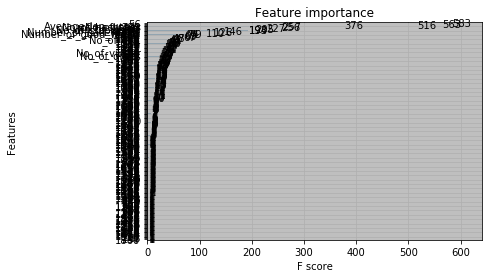

               feature_top  feature_importance
67                      56            0.094215
2        Average_len_words            0.090983
1               No_of_char            0.083387
4           No_of_hashtags            0.060763
796                    785            0.041532
0              No_of_words            0.041370
3          No_of_stopwords            0.036684
878                    867            0.033129
7                    upper            0.031351
9      Number_of_bad_words            0.031189
1204                  1193            0.023594
8     Number_of_good_words            0.020362
1176                  1165            0.017776
1483                  1472            0.012767
871                    860            0.011959
1034                  1023            0.011151
1020                  1009            0.011151
1276                  1265            0.010827
1611                  1600            0.007757
6               No_of_link            0.007595
749          

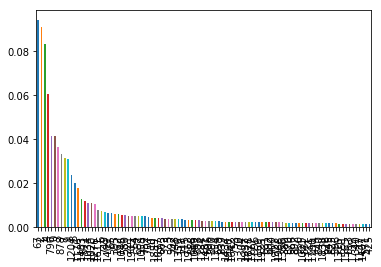

In [646]:
from xgboost import plot_importance
plot_importance(clf)
plt.show()
features = clf.feature_importances_
features = pd.Series(features).sort_values(ascending = False)[0:100]
imp_features = list(features.index)
print(pd.DataFrame({'feature_top':df_train.columns[imp_features],'feature_importance':features}))
features.plot(kind = 'bar')
plt.show()

In [662]:
cv_results

array([0.8926447 , 0.89070357, 0.90392562, 0.88588079, 0.8866241 ])

In [804]:
# Submission
submission = pd.DataFrame({'id':test['id'],'label':r})
submission.to_csv("ensemble3.csv",index = False)

In [579]:
pro.sum()

549

In [73]:
train.head()

,id,label,tweet,cleaned_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,"[fingerprint, Pregnancy, Test, https, android,..."
1,2,0,Finally a transparant silicon case ^^ Thanks t...,"[Finally, transparant, silicon, case, Thanks, ..."
2,3,0,We love this! Would you go? #talk #makememorie...,"[We, love, Would, go, talk, makememories, unpl..."
3,4,0,I'm wired I know I'm George I was made that wa...,"[I, wired, I, know, I, George, I, made, way, i..."
4,5,1,What amazing service! Apple won't even talk to...,"[What, amazing, service, Apple, wo, nt, even, ..."


In [ ]:
No of words in a sentence
No of char in a sentene
no of words length<3
no of words length>10
average length of words
No of uppercase words
No of stop words

In [80]:
len(train['tweet'][0].split(' '))

13

In [327]:
# No of words
train['No_of_words'] = train['tweet'].apply(lambda x: len(x.split(' ')))
test['No_of_words'] = test['tweet'].apply(lambda x: len(x.split(' ')))

In [328]:
# No of char
train['No_of_char'] = train['tweet'].apply(lambda x: len(x))
test['No_of_char'] = test['tweet'].apply(lambda x: len(x))

In [329]:
# Abg len words
train['Average_len_words'] = train['No_of_char']/train['No_of_words']
test['Average_len_words'] = test['No_of_char']/test['No_of_words']

In [ ]:
def stop(x):
    count = 0
    stop = stopwords.words('english')
    for w in x.split():
        if w in stop:
            print(w)
            count = count + 1
    print('\n')
    return count
    
    
train['No_of_stopwords'] = train['tweet'].apply(stop)
test['No_of_stopwords'] = test['tweet'].apply(stop)

In [324]:
train['No_of_hashtags'] = train['tweet'].apply(lambda x: len([w for w in x.split() if w.startswith('#')]))
test['No_of_hashtags'] = test['tweet'].apply(lambda x: len([w for w in x.split() if w.startswith('#')]))

In [323]:
test['No_of_digits'] = test['tweet'].apply(lambda x: len([w for w in x.split() if w.isdigit()]))
train['No_of_digits'] = train['tweet'].apply(lambda x: len([w for w in x.split() if w.isdigit()]))

In [322]:
train['No_of_link'] = train['tweet'].apply(lambda x: len([w for w in x.split() if w.startswith('http')]))
test['No_of_link'] = test['tweet'].apply(lambda x: len([w for w in x.split() if w.startswith('http')]))
train['No_of_digits'] = train['tweet'].apply(lambda x: len([w for w in x.split() if w.isdigit()]))
test['No_of_digits'] = test['tweet'].apply(lambda x: len([w for w in x.split() if w.isdigit()]))

In [321]:
train['upper'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
test['upper'] = test['tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

In [116]:
train

,id,label,tweet,cleaned_tweet,No_of_words,No_of_char,Average_len_words,No_of_stopwords,No_of_hashtags,No_of_digits,No_of_links,upper
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,"[fingerprint, Pregnancy, Test, https, android,...",13,128,9.846154,0,11,0,1,0
1,2,0,Finally a transparant silicon case ^^ Thanks t...,"[Finally, transparant, silicon, case, Thanks, ...",17,131,7.705882,3,5,0,1,1
2,3,0,We love this! Would you go? #talk #makememorie...,"[We, love, Would, go, talk, makememories, unpl...",15,123,8.200000,1,8,0,1,0
3,4,0,I'm wired I know I'm George I was made that wa...,"[I, wired, I, know, I, George, I, made, way, i...",17,112,6.588235,2,4,0,1,2
4,5,1,What amazing service! Apple won't even talk to...,"[What, amazing, service, Apple, wo, nt, even, ...",23,124,5.391304,9,0,0,0,2
5,6,1,iPhone software update fucked up my phone big ...,"[iPhone, software, update, fucked, phone, big,...",11,65,5.909091,2,0,0,0,0
6,7,0,Happy for us .. #instapic #instadaily #us #son...,"[Happy, us, instapic, instadaily, us, sony, xp...",11,100,9.090909,1,6,0,1,0
7,8,0,New Type C charger cable #UK http://www.ebay.c...,"[New, Type, C, charger, cable, UK, http, bay, ...",30,259,8.633333,0,16,2,1,4
8,9,0,Bout to go shopping again listening to music #...,"[Bout, go, shopping, listening, music, iphone,...",14,130,9.285714,3,5,0,1,0
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...,"[Photo, fun, selfie, pool, water, sony, camera...",14,128,9.142857,0,12,0,1,0


In [113]:
train.drop(['No_of_link'],axis =1,inplace = True)

In [119]:
train['tweet'].str.split()[0]

['#fingerprint',
 '#Pregnancy',
 'Test',
 'https://goo.gl/h1MfQV',
 '#android',
 '#apps',
 '#beautiful',
 '#cute',
 '#health',
 '#igers',
 '#iphoneonly',
 '#iphonesia',
 '#iphone']

<h2>Visualization</h2>

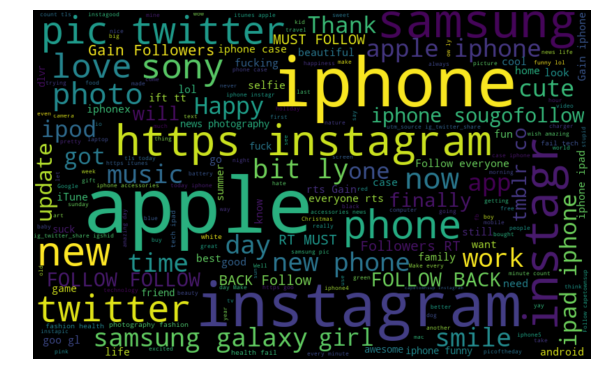

In [125]:
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in train['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

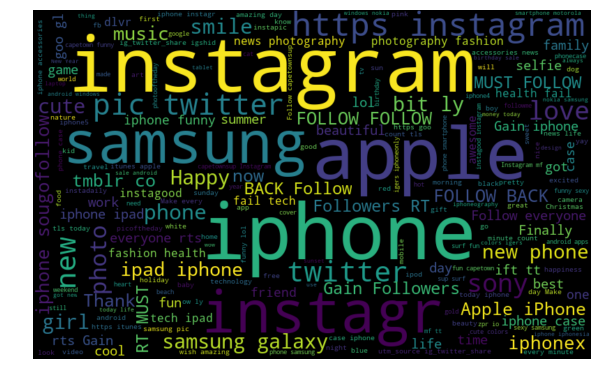

In [126]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

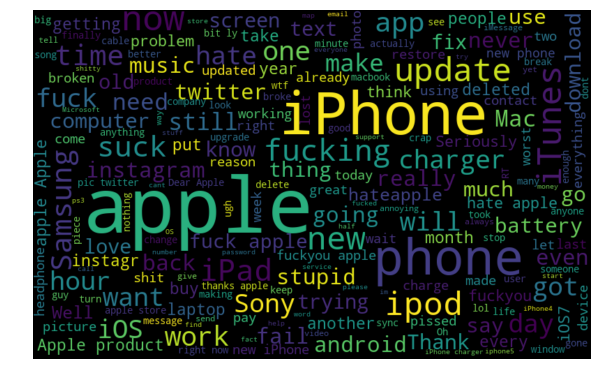

In [509]:
bad_words =' '.join([text for text in train['tweet'][train['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [541]:
pd.Series(' '.join([text for text in train['cleaned_tweet'][train['label'] == 0]]).split()).value_counts()[10:100]

life                       387
android                    364
photo                      364
rt                         353
day                        343
instagram                  338
like                       337
case                       334
cute                       320
gain                       311
photography                290
today                      286
fun                        272
galaxy                     261
news                       252
happy                      232
beautiful                  228
back                       227
smile                      226
instagood                  226
girl                       220
funny                      217
fashion                    213
got                        211
music                      206
birthday                   205
game                       203
app                        200
iphonex                    197
lol                        196
                          ... 
u                          123
camera  

In [542]:
bad_word = ['fuck','fucking','hate','suck','broken','problem','fuckyou','fail','stupid','nt']

In [543]:
good_word = ['love','life','instagram','fun','photo','photography','beautiful','instagood','gain','day','smile']

In [539]:
pd.Series(' '.join([text for text in train['cleaned_tweet'][train['label'] == 1]]).split()).value_counts()[:60]

apple         1312
iphone         575
phone          412
nt             387
http           198
new            183
get            167
update         150
itunes         137
ipod           130
hate           121
fuck           121
fucking        119
samsung        113
ca             113
time           111
like           104
one            103
ipad           100
suck            99
charger         92
work            91
got             84
io              84
want            83
hour            82
sony            82
day             75
need            70
still           67
make            66
fuckyou         66
would           64
mac             63
go              63
back            63
product         62
u               57
stupid          56
music           55
never           55
even            55
battery         54
wo              54
going           54
right           52
android         52
really          51
thanks          50
apps            50
everything      48
screen          48
say         

In [519]:
pd.Series(' '.join(train['cleaned_tweet']).split()).value_counts()[680:]

Saturday                                                            20
looking                                                             20
check                                                               20
bit                                                                 20
taking                                                              20
iPhones                                                             20
charging                                                            20
Sunday                                                              20
forever                                                             20
Have                                                                20
playing                                                             20
im                                                                  20
smart                                                               20
card                                                                20
cant  

In [147]:
import re
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [149]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

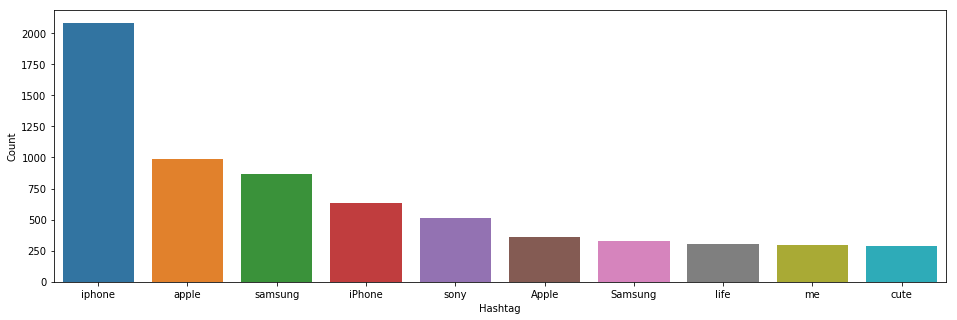

In [151]:
import seaborn as sns
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

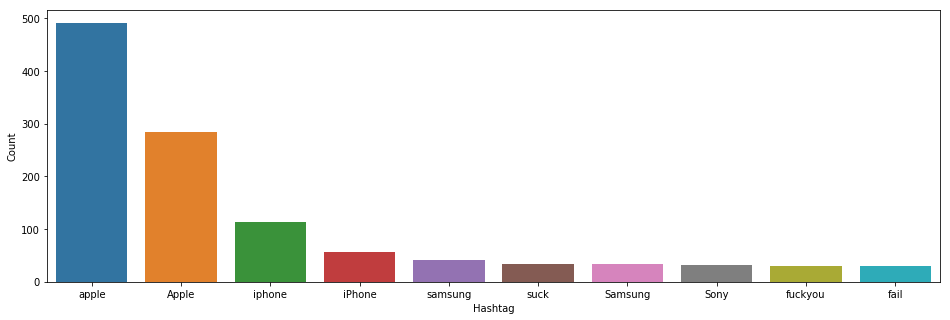

In [152]:
import seaborn as sns
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [171]:
train['b'] = train['tweet'].apply(lambda x: len([w for w in x.split()]))

In [172]:
train['b']

0       13
1       17
2       15
3       17
4       23
5       11
6       11
7       30
8       14
9       14
10      25
11      21
12      16
13      19
14      18
15      12
16      17
17      11
18      15
19      22
20      35
21      19
22      21
23      22
24      14
25      24
26      18
27      28
28      16
29      17
        ..
7890    19
7891    14
7892    19
7893    14
7894    23
7895    18
7896    16
7897    12
7898    24
7899    20
7900    21
7901    16
7902    24
7903    14
7904    17
7905    22
7906    11
7907    15
7908    23
7909    15
7910    11
7911    13
7912    17
7913    23
7914    18
7915    11
7916    24
7917    25
7918    16
7919    13
Name: b, Length: 7920, dtype: int64

In [155]:
train['cleaned_tweet'] = train['cleaned_tweet'].apply(lambda x: )

['fingerprint',
 'Pregnancy',
 'Test',
 'https',
 'android',
 'apps',
 'beautiful',
 'cute',
 'health',
 'igers',
 'iphoneonly',
 'iphonesia',
 'iphone']

In [188]:
a = []
for x in train['cleaned_tweet']:
    for w in x:
        a.append(w)
    

In [195]:
most_freq = pd.Series(a).value_counts()[:9]

In [225]:
most_freq = list(most_freq.index)

In [226]:
most_freq

['http',
 'iphone',
 'I',
 'apple',
 'iPhone',
 'Apple',
 'https',
 'samsung',
 'phone']

In [222]:
least_freq = pd.Series(a).value_counts()[6802:]

In [230]:
least_freq = list(least_freq.index)

In [228]:
train['cleaned_tweet_freq'] = train['cleaned_tweet'].apply(lambda x: ' '.join(w for w in x if w not in most_freq))

In [232]:
train['cleaned_tweet_freq'] = train['cleaned_tweet_freq'].apply(lambda x: ' '.join(w for w in x.split() if w not in least_freq))

In [233]:
train['cleaned_tweet_freq']

0       fingerprint Test android apps beautiful cute h...
1             Finally case Thanks uncle yay Sony Xperia S
2       We love Would go talk unplug relax smartphone ...
3                           wired know made way cute home
4       What amazing service wo nt even talk question ...
5          software update fucked big time Stupid iPhones
6       Happy us instapic instadaily us sony xperia xp...
7       New Type C charger cable UK Amazon etsy New Ye...
8       Bout go shopping listening music justme music ...
9       Photo fun selfie pool water sony camera picoft...
10      hey make new ipod dont make new color thinner ...
11           Ha Not heavy need really dropped ball design
12      Contemplating giving simply new Androids depre...
13      made another crazy purchase lol Work hard Play...
14          battery painful charge overnight battery dead
15       From towards downtown Saturday Sony summer urban
16                      Like Share want Phone Case Iphone
17      Go cra

In [792]:
a1 = pd.read_csv('new_feature.csv')
a2 = pd.read_csv('new_feature2.csv')
a3 = pd.read_csv('new_feature3.csv')
a4 = pd.read_csv('new_feature4.csv')
a5 = pd.read_csv('new_feature5.csv')
a6 = pd.read_csv('new_feature6.csv')

In [793]:
merge = a1.merge(a2,on='id',how = 'left').merge(a3,on='id',how = 'left').merge(a4,on='id',how = 'left').merge(a5,on='id',how = 'left').merge(a6,on='id',how = 'left')

In [298]:
merge.iloc[0,1]

7921

In [292]:
from statistics import mode
mode([1, 1, 2, 3, 3, 3, 3, 4])

3

In [795]:
a = [np.mean([merge.iloc[c,w] for w in range(1,6)]) for c in range(merge.shape[0])]

In [303]:
merge.shape[0]

1953

In [309]:
r = pd.Series(a)

In [802]:
r = r.apply(lambda x: 1 if x>=0.5 else 0)

In [803]:
r.sum()

476

In [806]:
with open('glove.6B.100d.txt', 'r') as G:
    print(G.read())

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 1215192: character maps to <undefined>

<h1> Word2vec</h2>

In [614]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=[i.split() for i in train['cleaned_tweet']], # tokenized senteces, list of list of strings
                 size=300,  # size of embedding vectors
                 workers=4, # how many threads?
                 min_count=1, # minimum frequency per token, filtering rare words
                 sample=0.02, # weight of downsampling common words
                 sg = 1, # should we use skip-gram? if 0, then cbow
                 iter=5,
                 hs = 0
        )

X = model[model.wv.vocab]

C:\Users\Akhand\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


In [615]:
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

C:\Users\Akhand\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


In [453]:
len(w2v)

19562

In [609]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, X):
        self.word2vec = X
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
#         self.dim = len(word2vec.itervalues().next())

    def fit(self,train,test):
        return self

    def transform(self, train):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0).tolist()
            for words in train
        ])

In [622]:
from collections import defaultdict
class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
#         self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
#         defaultdict = {}
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        # if a word was never seen - it must be at least as infrequent
        # as any of the known words - so the default idf is the max of 
        # known idf's
        max_idf = max(tfidf.idf_)
        s = [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()]
        d = defaultdict(lambda: max_idf,s)
#         try:
        self.word2weight = d
#         except:
#             self.word2weight = max_idf
        return self

    def transform(self, X):
#         defaultdict = {}
#         tfidf = TfidfVectorizer(analyzer=lambda x: x)
#         tfidf.fit(X)
#         max_idf = max(tfidf.idf_)
        return np.array([
                np.mean([self.word2vec[w]*self.word2weight[w] for w in words if w in self.word2vec], axis=0)
                for words in X
            ])

In [623]:
a = TfidfEmbeddingVectorizer(w2v)
a.fit(train['cleaned_tweet'],train['cleaned_tweet'])
X_train_word_features = a.transform(train['cleaned_tweet'])
X_test_word_features = a.transform(test['cleaned_tweet'])

In [465]:
metrix = pd.DataFrame(X_train_word_features)

In [624]:
metrix = pd.DataFrame(X_train_word_features)
d_train = train[['No_of_words', 'No_of_char','Average_len_words', 'No_of_stopwords', 'No_of_hashtags','No_of_digits', 'No_of_link', 'upper','Number_of_good_words', 'Number_of_bad_words','No_of_vulgar']].join(metrix)
metrix = pd.DataFrame(X_test_word_features)
d_test = test[['No_of_words', 'No_of_char','Average_len_words', 'No_of_stopwords', 'No_of_hashtags','No_of_digits', 'No_of_link', 'upper','Number_of_good_words', 'Number_of_bad_words','No_of_vulgar']].join(metrix)

In [625]:
# LDA
model = LinearDiscriminantAnalysis()
model.fit(d_train,train['label'])
cv_results = model_selection.cross_val_score(model,d_train,train['label'],cv=kfold,scoring='f1_weighted')
predict = model.predict(d_test)

C:\Users\Akhand\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Akhand\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Akhand\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Akhand\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Akhand\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Akhand\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [626]:
cv_results

array([0.87495342, 0.87896648, 0.88350003, 0.8670978 , 0.8762045 ])

In [478]:
predict.sum()

626

In [471]:
d_train.head()

,No_of_words,No_of_char,Average_len_words,No_of_stopwords,No_of_hashtags,No_of_digits,No_of_link,upper,0,1,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,13,128,9.846154,0,11,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,131,7.705882,3,5,0,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15,123,8.200000,1,8,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17,112,6.588235,2,4,0,1,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23,124,5.391304,9,0,0,0,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [500]:
w2v['fucking']

array([ 0.30135047,  0.2984437 , -0.27320147,  0.05095043,  0.11560576,
       -0.03379208,  0.18219113,  0.05181607, -0.17475343,  0.06571665,
        0.07722695,  0.23792897, -0.04533743,  0.12512814,  0.24380074,
       -0.04755902, -0.02274137, -0.11466401,  0.12855221,  0.2349413 ,
        0.02670834,  0.1468276 ,  0.08043145,  0.11334316, -0.17365582,
       -0.18856439,  0.2531135 , -0.06346248,  0.12550709, -0.26534113,
        0.41366124, -0.20241207, -0.06756273,  0.06677715,  0.48561218,
       -0.35873878,  0.09311224, -0.22216067,  0.22168663, -0.14766374,
       -0.30366662,  0.14924437,  0.17838217,  0.3108017 , -0.22808424,
        0.01304205, -0.01863691,  0.23942925, -0.04138081,  0.15836123,
       -0.05059346,  0.04028216, -0.32084116, -0.07503178, -0.21326411,
       -0.03716024,  0.0848282 , -0.14183469,  0.3707886 , -0.17274238,
        0.20163588,  0.2093912 ,  0.00726291, -0.20303673, -0.20045331,
        0.02987618, -0.28544545,  0.1411797 , -0.26484168, -0.19

In [ ]:
train['No_of_fuck'] = train['tweet'].apply()

In [502]:
train['tweet'][0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [545]:
train['Number_of_good_words'] = train['cleaned_tweet'].apply(lambda x: len([w for w in x.split() if w in good_word]))
train['Number_of_bad_words'] = train['cleaned_tweet'].apply(lambda x: len([w for w in x.split() if w in bad_word]))
test['Number_of_good_words'] = test['cleaned_tweet'].apply(lambda x: len([w for w in x.split() if w in good_word]))
test['Number_of_bad_words'] = test['cleaned_tweet'].apply(lambda x: len([w for w in x.split() if w in bad_word]))
train['No_of_vulgar'] = train['tweet'].apply(lambda x: len([w for w in x.split() if w == '$&@*#']))
test['No_of_vulgar'] = test['tweet'].apply(lambda x: len([w for w in x.split() if w == '$&@*#']))

In [556]:
train.corr()

,id,label,No_of_words,No_of_char,Average_len_words,No_of_stopwords,No_of_hashtags,No_of_digits,No_of_links,upper,b,No_of_link,Number_of_good_words,Number_of_bad_words,No_of_vulgar
id,1.000000,0.004478,-0.008524,-0.006162,-0.004118,-0.005109,0.006068,0.004047,0.009060,0.003267,-0.008605,0.009060,-0.011721,-0.009923,-0.002762
label,0.004478,1.000000,0.117021,-0.289822,-0.526190,0.521064,-0.487495,0.054017,-0.508603,0.056317,0.116934,-0.508603,-0.266484,0.405437,0.138876
No_of_words,-0.008524,0.117021,1.000000,0.684040,-0.268416,0.484931,0.285096,0.180781,-0.224215,0.162797,0.999983,-0.224215,0.109510,0.111656,0.036042
No_of_char,-0.006162,-0.289822,0.684040,1.000000,0.487406,-0.089216,0.702676,0.044306,0.269856,-0.017188,0.684078,0.269856,0.218395,-0.122436,-0.062938
Average_len_words,-0.004118,-0.526190,-0.268416,0.487406,1.000000,-0.638134,0.541848,-0.140119,0.638144,-0.210384,-0.268366,0.638144,0.150801,-0.281079,-0.122796
No_of_stopwords,-0.005109,0.521064,0.484931,-0.089216,-0.638134,1.000000,-0.503973,0.066648,-0.515796,-0.030231,0.484877,-0.515796,-0.249179,0.250782,0.110209
No_of_hashtags,0.006068,-0.487495,0.285096,0.702676,0.541848,-0.503973,1.000000,-0.056646,0.393261,-0.119210,0.285131,0.393261,0.344903,-0.204999,-0.111825
No_of_digits,0.004047,0.054017,0.180781,0.044306,-0.140119,0.066648,-0.056646,1.000000,-0.088960,0.064173,0.180805,-0.088960,-0.009321,-0.003133,-0.003365
No_of_links,0.009060,-0.508603,-0.224215,0.269856,0.638144,-0.515796,0.393261,-0.088960,1.000000,-0.179899,-0.224094,1.000000,0.132142,-0.248028,-0.113480
upper,0.003267,0.056317,0.162797,-0.017188,-0.210384,-0.030231,-0.119210,0.064173,-0.179899,1.000000,0.162853,-0.179899,0.063669,0.099260,0.004055


In [554]:
train['No_of_vulgar'].value_counts()

0    7726
1     186
2       6
3       1
5       1
Name: No_of_vulgar, dtype: int64

In [544]:
good_word

['love',
 'life',
 'instagram',
 'fun',
 'photo',
 'photography',
 'beautiful',
 'instagood',
 'gain',
 'day',
 'smile']